In [165]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
# sentiment analysis 

import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud, STOPWORDS
# os.chdir("D:\CSP 571\yelp data")
business = pd.read_json('business.json', lines=True)

### First we will chek the columns of the business data

In [111]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [112]:
business.categories.isnull().sum()

482

In [113]:
business.categories = business.categories.fillna(" ")

In [114]:
business.categories.isnull().sum()

0

In [115]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,59371
1,Shopping,31878
2,Food,29989
3,Home Services,19729
4,Beauty & Spas,19370
...,...,...
1296,Halfway Houses,1
1297,Eastern European,1
1298,Rotisserie Chicken,1
1299,Calligraphy,1


### There are 1301 categories. We shall check top 10 categories.

In [117]:
cat= cat.sort_values(by = 'Count', ascending = False)

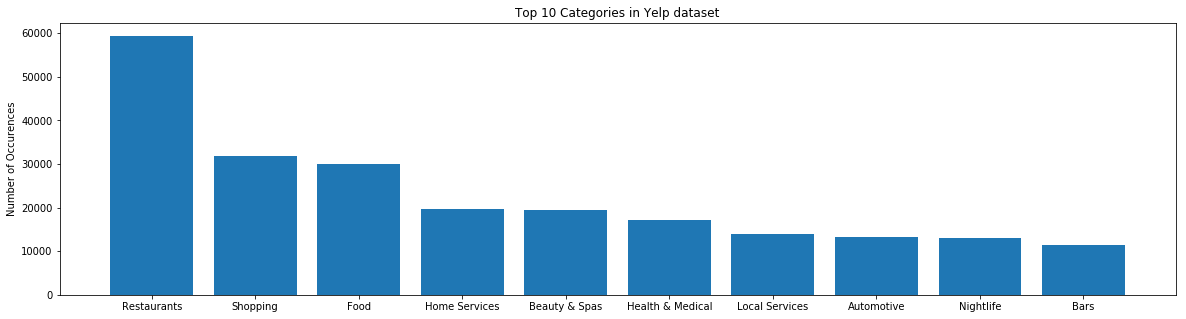

In [118]:
cat = cat[0:10]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

### The most popular tag is Restaurants

### Now we will all those records which has 'Restaurant' or 'Food' in their categories column and store it in a dataframe

In [119]:
# categories = business.categories
# for i in categories:
#     if 'Restaurants' in i or 'Food' in i:
#         print(i)

In [102]:
# creating a dataframe to store all the records which has 'Restaurants' or 'Food' in their categories column
bus = pd.DataFrame()
for i in business.index:
    if 'Restaurants' in business.categories[i] or 'Food' in business.categories[i]:
        bus = bus.append(business.iloc[i])

1
2
11
13
14
17
23
25
26
29
32
33
35
43
45
47
50
53
54
58
61
66
71
73
75
77
78
79
80
81
82
83
92
96
97
101
104
107
111
113
115
116
119
120
121
125
128
133
135
137
139
140
141
146
147
149
156
157
159
162
163
165
166
169
172
173
174
176
177
178
180
181
185
187
189
190
196
197
198
200
204
206
207
208
214
216
217
224
225
226
228
229
236
238
240
243
247
249
254
256
258
259
260
262
263
269
273
276
277
278
285
286
293
294
295
297
298
300
302
305
307
308
309
311
315
319
321
327
334
335
336
337
340
343
346
352
353
354
355
356
362
363
364
367
374
377
381
384
387
388
392
393
396
400
406
407
409
410
411
413
414
415
417
418
422
424
425
426
428
431
432
433
434
435
437
439
441
444
445
446
452
453
454
457
460
464
465
468
469
470
483
485
492
494
495
497
498
502
505
506
507
509
513
514
523
524
529
530
532
534
535
536
537
540
541
542
543
544
552
553
563
564
565
567
571
577
579
584
593
595
599
601
602
603
604
610
612
618
621
625
627
628
630
632
633
634
635
637
638
641
650
651
652
655
658
665
666
671
673
6

4507
4513
4514
4519
4523
4524
4525
4526
4527
4528
4531
4535
4537
4540
4543
4544
4547
4548
4549
4550
4551
4553
4554
4558
4562
4564
4565
4566
4571
4575
4577
4578
4588
4589
4592
4594
4596
4597
4599
4601
4605
4607
4609
4612
4614
4616
4619
4620
4628
4629
4631
4634
4636
4637
4639
4641
4642
4644
4648
4651
4653
4656
4657
4659
4662
4663
4664
4665
4666
4667
4670
4671
4672
4675
4676
4679
4680
4684
4687
4692
4694
4697
4698
4700
4701
4703
4708
4709
4714
4716
4719
4721
4724
4725
4727
4729
4732
4734
4738
4739
4740
4742
4743
4745
4747
4751
4752
4757
4759
4760
4763
4765
4773
4774
4775
4777
4778
4779
4781
4784
4785
4786
4796
4797
4798
4805
4808
4810
4811
4812
4813
4814
4816
4818
4820
4821
4822
4823
4828
4829
4831
4832
4834
4835
4837
4838
4839
4845
4846
4848
4849
4850
4861
4862
4865
4866
4867
4874
4875
4880
4881
4889
4891
4892
4895
4901
4902
4904
4906
4914
4923
4924
4927
4929
4932
4937
4940
4941
4943
4945
4946
4947
4950
4951
4952
4955
4957
4958
4959
4962
4964
4965
4966
4968
4970
4973
4978
4979
4981
4983


8891
8894
8895
8898
8902
8903
8909
8910
8917
8918
8920
8922
8930
8933
8936
8937
8939
8940
8943
8944
8946
8952
8954
8957
8960
8964
8965
8974
8976
8977
8978
8979
8980
8981
8982
8989
8992
8993
8994
8996
8999
9002
9003
9006
9007
9017
9019
9024
9028
9029
9032
9033
9035
9041
9043
9045
9046
9048
9055
9057
9061
9068
9069
9070
9076
9082
9085
9088
9093
9094
9095
9100
9102
9104
9107
9108
9109
9113
9114
9116
9117
9119
9124
9125
9126
9128
9130
9133
9134
9138
9139
9140
9141
9142
9144
9145
9146
9149
9152
9155
9156
9157
9159
9164
9166
9168
9172
9174
9175
9176
9178
9180
9182
9191
9192
9197
9203
9205
9206
9207
9208
9212
9214
9215
9216
9224
9227
9232
9237
9238
9239
9240
9241
9246
9247
9249
9254
9255
9258
9259
9260
9261
9263
9267
9273
9277
9280
9281
9282
9283
9284
9285
9290
9292
9293
9294
9295
9298
9301
9303
9304
9309
9310
9313
9320
9321
9323
9324
9332
9333
9337
9343
9344
9345
9347
9349
9352
9354
9355
9358
9360
9364
9365
9370
9372
9373
9374
9376
9380
9382
9383
9384
9385
9390
9396
9398
9399
9404
9405
9408


12738
12743
12745
12747
12750
12754
12755
12756
12764
12765
12766
12769
12771
12772
12776
12785
12786
12789
12794
12796
12798
12799
12800
12801
12802
12804
12806
12807
12810
12811
12812
12815
12816
12823
12824
12828
12832
12833
12834
12837
12846
12849
12850
12851
12853
12854
12855
12857
12859
12861
12864
12866
12871
12872
12880
12883
12896
12902
12903
12907
12916
12918
12920
12921
12923
12930
12931
12937
12938
12939
12943
12947
12948
12949
12951
12953
12954
12958
12961
12971
12975
12978
12979
12983
12985
12987
12990
12999
13003
13005
13006
13008
13010
13012
13013
13018
13020
13022
13024
13026
13028
13029
13032
13034
13037
13038
13042
13045
13047
13048
13051
13053
13054
13055
13056
13057
13058
13062
13067
13068
13071
13075
13077
13078
13082
13083
13087
13090
13093
13098
13104
13105
13107
13108
13112
13114
13115
13121
13123
13125
13126
13129
13130
13135
13138
13144
13147
13149
13150
13152
13155
13160
13164
13167
13170
13171
13172
13173
13174
13176
13177
13180
13181
13182
13187
13188
1319

16391
16397
16400
16406
16407
16408
16410
16411
16413
16416
16417
16423
16425
16426
16430
16433
16434
16437
16440
16442
16443
16444
16452
16457
16459
16466
16470
16477
16479
16480
16483
16484
16488
16491
16493
16494
16497
16498
16501
16503
16509
16515
16516
16520
16521
16524
16526
16530
16533
16535
16542
16544
16547
16552
16553
16556
16557
16560
16565
16566
16568
16569
16578
16580
16584
16585
16588
16589
16594
16596
16597
16602
16604
16605
16608
16609
16610
16614
16617
16623
16630
16631
16633
16636
16637
16638
16642
16643
16646
16648
16652
16657
16659
16660
16661
16662
16663
16666
16667
16670
16672
16675
16679
16681
16684
16685
16686
16687
16689
16690
16692
16693
16695
16697
16698
16700
16702
16704
16707
16708
16709
16710
16711
16712
16717
16718
16720
16723
16725
16728
16731
16741
16743
16744
16750
16756
16757
16758
16761
16772
16774
16782
16783
16786
16788
16791
16793
16795
16796
16798
16799
16800
16802
16803
16805
16807
16808
16811
16812
16813
16814
16817
16819
16821
16822
16825
1682

19971
19973
19975
19976
19979
19985
19989
19991
19997
19999
20002
20003
20004
20006
20009
20011
20015
20016
20017
20021
20025
20030
20036
20037
20038
20040
20041
20043
20049
20050
20051
20054
20056
20060
20063
20069
20070
20072
20088
20090
20092
20095
20096
20100
20103
20106
20107
20108
20111
20114
20119
20125
20130
20131
20140
20142
20144
20148
20150
20151
20153
20154
20155
20157
20160
20163
20165
20167
20169
20171
20174
20175
20176
20179
20180
20185
20187
20188
20190
20192
20193
20203
20206
20210
20211
20215
20217
20220
20221
20223
20224
20226
20227
20231
20233
20236
20238
20239
20240
20242
20243
20244
20246
20247
20251
20252
20253
20254
20257
20262
20267
20272
20276
20279
20281
20283
20285
20286
20288
20290
20292
20293
20294
20295
20297
20299
20300
20303
20304
20306
20310
20312
20314
20318
20321
20325
20331
20332
20338
20341
20342
20346
20347
20353
20356
20360
20362
20366
20370
20376
20384
20389
20397
20401
20405
20407
20409
20414
20416
20419
20420
20425
20426
20428
20431
20434
2043

23472
23473
23474
23475
23479
23481
23482
23485
23488
23489
23490
23491
23492
23495
23496
23502
23503
23504
23507
23512
23514
23517
23518
23520
23521
23523
23529
23533
23537
23538
23539
23540
23543
23544
23547
23548
23552
23558
23564
23565
23566
23571
23575
23576
23577
23579
23580
23581
23591
23592
23593
23594
23598
23602
23604
23605
23606
23610
23611
23619
23622
23623
23624
23627
23636
23639
23641
23642
23643
23651
23652
23655
23656
23658
23661
23666
23667
23669
23670
23672
23673
23674
23675
23678
23681
23689
23690
23692
23696
23697
23698
23699
23700
23702
23705
23707
23709
23715
23721
23722
23723
23726
23727
23728
23731
23734
23735
23738
23742
23744
23746
23747
23749
23750
23751
23754
23756
23759
23760
23764
23767
23768
23770
23773
23774
23778
23783
23784
23787
23788
23790
23792
23795
23798
23800
23802
23803
23805
23806
23807
23812
23814
23815
23817
23819
23821
23822
23830
23833
23835
23839
23841
23845
23847
23850
23855
23856
23857
23859
23860
23861
23863
23864
23865
23866
23870
2387

26999
27004
27010
27013
27014
27015
27017
27018
27021
27022
27023
27024
27030
27035
27038
27041
27044
27055
27059
27062
27066
27067
27072
27073
27074
27075
27079
27083
27085
27086
27092
27098
27104
27107
27114
27116
27118
27122
27127
27132
27135
27137
27139
27141
27142
27145
27148
27152
27153
27154
27155
27157
27159
27160
27161
27166
27167
27168
27169
27171
27173
27175
27176
27180
27183
27185
27190
27191
27193
27194
27195
27196
27198
27200
27201
27207
27208
27212
27216
27218
27222
27223
27224
27226
27229
27231
27232
27235
27236
27237
27240
27242
27244
27248
27252
27258
27262
27263
27265
27269
27270
27272
27273
27274
27276
27277
27278
27279
27281
27282
27283
27290
27291
27292
27295
27296
27297
27299
27300
27302
27303
27304
27305
27307
27309
27312
27314
27315
27317
27318
27320
27323
27325
27326
27327
27328
27329
27333
27334
27340
27341
27342
27345
27354
27355
27356
27358
27361
27364
27367
27369
27370
27371
27374
27376
27378
27379
27383
27385
27386
27387
27388
27391
27392
27399
27406
2740

30619
30623
30630
30631
30635
30637
30639
30640
30643
30644
30645
30647
30648
30652
30653
30655
30656
30657
30658
30659
30665
30666
30670
30672
30674
30677
30679
30680
30681
30683
30686
30688
30689
30695
30696
30697
30699
30704
30707
30708
30714
30717
30721
30726
30728
30730
30732
30733
30735
30737
30738
30741
30744
30746
30747
30750
30753
30757
30758
30759
30761
30765
30767
30768
30769
30774
30775
30776
30777
30778
30780
30784
30795
30796
30800
30804
30807
30808
30810
30816
30817
30821
30823
30825
30826
30827
30831
30832
30833
30836
30839
30841
30843
30846
30848
30849
30855
30858
30859
30860
30862
30863
30865
30867
30868
30871
30873
30875
30876
30877
30878
30883
30885
30888
30890
30894
30895
30897
30900
30902
30904
30905
30906
30908
30910
30912
30913
30914
30920
30921
30922
30923
30926
30927
30929
30933
30937
30938
30939
30941
30943
30945
30948
30949
30951
30952
30954
30957
30958
30959
30961
30965
30966
30967
30968
30970
30975
30977
30980
30983
30988
30990
30991
30992
30993
30994
3099

34182
34183
34185
34189
34191
34192
34193
34195
34197
34198
34200
34203
34205
34207
34208
34214
34217
34218
34219
34220
34229
34230
34234
34241
34243
34244
34249
34250
34251
34258
34260
34262
34263
34265
34266
34273
34276
34282
34283
34284
34288
34293
34295
34296
34299
34303
34305
34311
34313
34314
34318
34319
34321
34323
34324
34325
34326
34327
34329
34331
34332
34333
34334
34337
34339
34342
34345
34348
34350
34352
34360
34361
34365
34366
34367
34369
34371
34372
34373
34374
34380
34386
34388
34390
34393
34395
34397
34398
34399
34403
34408
34412
34413
34415
34416
34417
34419
34421
34422
34424
34425
34426
34427
34434
34437
34438
34441
34443
34444
34449
34453
34454
34455
34456
34466
34468
34472
34473
34476
34477
34484
34485
34489
34491
34493
34494
34496
34502
34503
34509
34510
34512
34527
34529
34532
34533
34538
34539
34540
34550
34555
34556
34558
34562
34563
34564
34571
34574
34575
34579
34581
34585
34586
34590
34596
34597
34599
34600
34601
34605
34608
34610
34615
34621
34622
34625
3462

37687
37688
37689
37693
37694
37696
37697
37698
37699
37702
37704
37705
37709
37711
37716
37717
37720
37721
37723
37727
37728
37729
37730
37731
37733
37734
37735
37736
37739
37740
37741
37744
37747
37750
37752
37754
37758
37760
37762
37763
37764
37765
37766
37769
37770
37771
37773
37775
37776
37780
37787
37788
37791
37793
37797
37802
37808
37812
37813
37821
37826
37827
37831
37832
37834
37835
37839
37840
37841
37842
37843
37845
37847
37849
37853
37854
37856
37857
37860
37862
37863
37865
37866
37869
37871
37872
37874
37875
37879
37880
37881
37883
37884
37887
37891
37897
37901
37906
37907
37916
37918
37919
37921
37922
37923
37926
37929
37932
37936
37937
37938
37940
37943
37947
37949
37954
37955
37961
37962
37965
37967
37970
37974
37977
37979
37980
37997
38005
38017
38019
38020
38022
38024
38027
38028
38033
38036
38037
38039
38040
38042
38048
38050
38052
38053
38054
38056
38058
38062
38063
38065
38067
38069
38070
38072
38074
38075
38078
38079
38084
38088
38090
38091
38098
38099
38102
3810

41196
41198
41199
41200
41203
41206
41207
41208
41211
41212
41214
41217
41220
41224
41227
41228
41232
41242
41243
41244
41247
41249
41252
41255
41258
41261
41262
41264
41265
41266
41268
41270
41272
41276
41277
41278
41279
41280
41281
41284
41286
41287
41289
41290
41291
41294
41296
41297
41298
41300
41302
41310
41311
41313
41315
41318
41321
41322
41324
41329
41332
41333
41339
41340
41345
41346
41347
41348
41352
41360
41363
41369
41370
41371
41372
41374
41377
41378
41379
41380
41381
41387
41388
41389
41391
41398
41402
41404
41414
41421
41423
41425
41431
41432
41434
41437
41439
41440
41441
41446
41447
41448
41453
41457
41458
41464
41468
41472
41473
41474
41478
41480
41481
41484
41487
41489
41490
41496
41497
41498
41499
41500
41504
41506
41517
41521
41522
41523
41526
41527
41529
41530
41531
41534
41535
41536
41537
41538
41540
41542
41543
41549
41550
41553
41554
41555
41556
41559
41567
41569
41571
41578
41579
41585
41587
41588
41589
41591
41592
41593
41596
41599
41601
41602
41603
41605
4161

44735
44738
44739
44746
44749
44754
44756
44759
44764
44765
44768
44776
44779
44784
44786
44789
44790
44791
44793
44795
44801
44802
44803
44807
44811
44812
44813
44817
44824
44827
44830
44838
44840
44841
44842
44852
44853
44855
44856
44857
44859
44862
44865
44867
44868
44870
44874
44877
44879
44881
44883
44885
44892
44895
44897
44898
44905
44912
44913
44917
44918
44921
44924
44926
44930
44932
44933
44939
44940
44941
44945
44946
44947
44948
44950
44951
44953
44954
44959
44960
44964
44965
44968
44969
44982
44994
44997
44999
45002
45005
45008
45009
45013
45014
45017
45019
45020
45021
45025
45027
45033
45034
45037
45038
45044
45051
45058
45065
45066
45067
45069
45071
45073
45077
45082
45085
45086
45087
45088
45089
45094
45095
45098
45101
45102
45105
45113
45120
45121
45122
45123
45124
45125
45127
45128
45131
45132
45134
45147
45148
45149
45150
45153
45157
45158
45161
45164
45166
45175
45178
45179
45180
45182
45186
45187
45189
45196
45199
45202
45204
45208
45212
45214
45217
45218
45222
4522

48319
48321
48322
48324
48325
48328
48329
48330
48332
48334
48335
48336
48338
48340
48344
48345
48346
48348
48351
48353
48357
48358
48359
48361
48365
48367
48369
48372
48379
48380
48381
48387
48389
48390
48391
48392
48394
48398
48401
48407
48408
48409
48410
48414
48415
48416
48421
48429
48432
48433
48434
48435
48436
48438
48444
48446
48448
48451
48452
48453
48455
48456
48457
48458
48459
48468
48469
48478
48483
48487
48488
48489
48490
48493
48494
48495
48496
48497
48498
48500
48502
48503
48505
48506
48507
48511
48512
48518
48520
48521
48522
48524
48525
48527
48534
48535
48538
48547
48548
48549
48550
48552
48553
48555
48560
48561
48563
48564
48567
48570
48571
48572
48574
48575
48577
48581
48584
48585
48591
48592
48599
48600
48603
48604
48605
48609
48613
48617
48622
48624
48626
48633
48637
48638
48640
48641
48642
48645
48648
48649
48651
48652
48653
48659
48664
48667
48670
48671
48672
48673
48681
48683
48688
48692
48695
48697
48699
48701
48703
48704
48706
48711
48712
48713
48714
48715
4871

51766
51772
51773
51777
51778
51779
51780
51783
51790
51791
51794
51799
51802
51805
51807
51811
51812
51813
51817
51819
51821
51823
51825
51830
51834
51840
51841
51843
51851
51853
51855
51858
51859
51864
51865
51867
51873
51881
51882
51884
51886
51887
51888
51890
51893
51897
51899
51901
51902
51906
51914
51915
51918
51921
51925
51927
51928
51929
51930
51934
51935
51937
51939
51941
51942
51951
51952
51958
51959
51963
51965
51971
51972
51973
51974
51979
51983
51985
51992
51994
51999
52000
52003
52006
52007
52008
52010
52014
52015
52016
52017
52020
52021
52027
52030
52031
52032
52035
52037
52040
52043
52047
52048
52050
52060
52064
52065
52066
52068
52070
52074
52075
52077
52078
52079
52080
52089
52092
52096
52098
52100
52102
52109
52110
52114
52115
52116
52121
52125
52127
52129
52130
52132
52134
52136
52137
52138
52143
52148
52150
52153
52154
52157
52159
52160
52162
52163
52168
52169
52174
52175
52176
52177
52179
52182
52184
52187
52188
52192
52193
52195
52196
52198
52199
52202
52207
5221

55274
55276
55277
55278
55281
55282
55283
55286
55290
55292
55296
55297
55300
55301
55302
55303
55308
55309
55312
55313
55314
55321
55325
55326
55331
55333
55334
55336
55347
55350
55352
55353
55357
55359
55362
55368
55370
55371
55373
55374
55376
55378
55379
55380
55385
55388
55389
55400
55401
55405
55406
55407
55408
55409
55410
55411
55415
55416
55418
55419
55420
55423
55424
55425
55427
55429
55430
55431
55432
55433
55434
55436
55438
55439
55441
55443
55444
55447
55449
55455
55456
55457
55458
55464
55465
55467
55474
55475
55477
55478
55480
55483
55485
55486
55489
55490
55492
55493
55499
55500
55505
55507
55509
55513
55516
55517
55519
55526
55532
55533
55535
55536
55538
55539
55540
55542
55543
55546
55552
55555
55561
55567
55568
55569
55571
55577
55582
55583
55584
55586
55587
55596
55598
55602
55604
55606
55609
55611
55612
55613
55614
55618
55620
55623
55628
55629
55630
55632
55633
55634
55635
55636
55637
55638
55641
55642
55649
55650
55651
55652
55653
55655
55656
55659
55664
55667
5566

58720
58723
58724
58725
58726
58727
58728
58729
58730
58734
58735
58736
58743
58747
58748
58754
58755
58759
58764
58775
58776
58782
58786
58790
58791
58794
58795
58799
58800
58801
58803
58804
58810
58812
58814
58815
58816
58817
58818
58819
58822
58825
58831
58834
58837
58839
58840
58841
58842
58845
58850
58851
58852
58853
58856
58862
58867
58868
58870
58874
58880
58884
58889
58890
58891
58894
58895
58901
58902
58903
58905
58910
58913
58916
58917
58918
58920
58921
58923
58924
58927
58928
58933
58936
58937
58938
58939
58940
58944
58945
58947
58949
58950
58951
58952
58953
58954
58955
58960
58961
58963
58964
58970
58971
58974
58977
58985
58991
58998
58999
59002
59005
59007
59009
59012
59013
59017
59018
59024
59025
59027
59029
59030
59031
59035
59036
59042
59043
59046
59049
59051
59053
59054
59055
59058
59061
59069
59073
59076
59078
59083
59090
59091
59092
59093
59094
59096
59098
59099
59103
59104
59110
59112
59116
59121
59122
59125
59126
59128
59129
59131
59133
59135
59137
59141
59144
5914

62225
62229
62232
62233
62234
62236
62238
62242
62244
62247
62248
62249
62250
62251
62252
62255
62256
62257
62259
62262
62263
62264
62267
62269
62272
62275
62276
62279
62284
62285
62286
62287
62288
62290
62295
62300
62301
62302
62312
62313
62315
62319
62322
62324
62328
62331
62333
62335
62336
62338
62339
62342
62343
62345
62346
62350
62356
62364
62366
62370
62372
62373
62374
62375
62378
62379
62381
62382
62384
62385
62388
62389
62391
62392
62393
62395
62398
62399
62403
62404
62406
62408
62412
62415
62418
62419
62421
62424
62425
62428
62431
62432
62434
62435
62436
62440
62441
62442
62446
62447
62449
62452
62453
62455
62456
62457
62458
62461
62465
62468
62469
62475
62477
62480
62481
62482
62485
62488
62489
62492
62497
62498
62501
62502
62503
62505
62506
62508
62509
62510
62511
62514
62516
62519
62520
62525
62527
62528
62529
62530
62531
62532
62534
62536
62537
62538
62540
62541
62544
62545
62549
62553
62556
62559
62562
62563
62565
62567
62572
62573
62580
62581
62582
62583
62584
62589
6259

65671
65672
65673
65677
65678
65679
65683
65685
65688
65695
65696
65703
65704
65706
65715
65717
65721
65723
65726
65729
65730
65732
65738
65739
65749
65751
65752
65755
65756
65757
65760
65761
65766
65769
65775
65777
65783
65791
65793
65795
65798
65799
65800
65801
65804
65807
65809
65815
65816
65817
65819
65820
65822
65824
65825
65826
65831
65835
65836
65838
65839
65841
65842
65845
65848
65849
65851
65853
65855
65857
65860
65862
65864
65866
65868
65869
65877
65878
65879
65880
65883
65885
65886
65887
65890
65893
65894
65895
65897
65898
65901
65904
65907
65908
65909
65910
65911
65912
65913
65918
65922
65923
65925
65926
65929
65930
65933
65936
65938
65939
65941
65944
65946
65951
65955
65956
65957
65961
65963
65964
65965
65973
65978
65982
65983
65984
65988
65989
65992
65996
65997
65998
65999
66002
66004
66010
66014
66015
66016
66018
66021
66023
66026
66031
66034
66038
66039
66040
66041
66043
66044
66047
66048
66051
66053
66057
66058
66066
66070
66073
66085
66086
66093
66097
66101
66108
6611

69161
69164
69166
69170
69174
69176
69181
69182
69185
69192
69193
69195
69196
69198
69199
69200
69207
69208
69212
69213
69214
69216
69222
69224
69227
69229
69235
69238
69240
69241
69245
69247
69248
69249
69253
69255
69256
69257
69258
69261
69262
69263
69265
69267
69270
69273
69274
69278
69279
69281
69284
69285
69291
69293
69294
69295
69296
69297
69305
69306
69307
69309
69311
69312
69314
69316
69318
69319
69320
69322
69324
69327
69328
69329
69331
69332
69340
69341
69342
69344
69345
69350
69353
69354
69355
69357
69366
69367
69368
69370
69371
69374
69376
69377
69378
69379
69380
69381
69386
69388
69390
69391
69394
69395
69396
69400
69409
69410
69411
69414
69415
69421
69423
69425
69427
69428
69430
69432
69433
69434
69436
69437
69438
69441
69445
69446
69448
69450
69454
69456
69459
69461
69469
69471
69472
69473
69476
69479
69481
69482
69484
69485
69487
69489
69492
69494
69500
69501
69503
69504
69507
69512
69516
69520
69525
69526
69527
69528
69533
69536
69539
69540
69544
69546
69548
69549
6955

72714
72715
72719
72720
72728
72729
72733
72737
72739
72740
72741
72747
72753
72757
72761
72764
72769
72771
72776
72781
72784
72788
72789
72790
72793
72798
72802
72803
72805
72810
72812
72821
72822
72824
72825
72826
72827
72829
72832
72833
72834
72836
72840
72842
72843
72854
72857
72858
72863
72865
72870
72871
72875
72879
72880
72882
72884
72886
72889
72890
72891
72894
72897
72899
72900
72904
72907
72910
72912
72914
72918
72919
72925
72936
72938
72944
72945
72951
72960
72964
72968
72969
72970
72971
72973
72974
72981
72984
72990
72992
72994
72995
72997
73004
73011
73012
73016
73017
73019
73021
73022
73023
73025
73028
73031
73032
73034
73037
73040
73041
73045
73047
73051
73052
73053
73054
73055
73057
73058
73061
73065
73066
73067
73070
73072
73074
73076
73077
73079
73080
73084
73085
73086
73087
73088
73089
73090
73097
73100
73103
73106
73109
73110
73111
73115
73116
73118
73120
73124
73127
73128
73129
73130
73132
73133
73136
73138
73145
73147
73149
73152
73157
73159
73162
73164
73166
7316

76127
76129
76132
76134
76137
76140
76147
76148
76150
76155
76157
76158
76159
76160
76162
76163
76164
76165
76166
76167
76170
76171
76172
76173
76174
76176
76180
76183
76184
76187
76189
76191
76192
76196
76197
76199
76201
76202
76209
76211
76215
76217
76218
76219
76221
76222
76223
76224
76225
76227
76229
76231
76232
76233
76235
76239
76241
76247
76253
76255
76256
76259
76261
76264
76266
76271
76273
76275
76279
76285
76289
76291
76292
76293
76295
76298
76300
76302
76305
76306
76309
76312
76314
76317
76321
76322
76325
76326
76329
76331
76335
76340
76342
76346
76351
76355
76362
76363
76364
76365
76368
76371
76374
76378
76379
76381
76382
76383
76386
76388
76389
76391
76392
76396
76397
76400
76406
76409
76411
76413
76414
76415
76416
76418
76425
76427
76428
76431
76434
76435
76436
76437
76438
76440
76441
76444
76445
76446
76447
76449
76454
76456
76457
76458
76461
76462
76463
76466
76467
76468
76471
76472
76474
76475
76476
76478
76479
76483
76486
76487
76488
76489
76493
76495
76498
76501
7650

79636
79638
79639
79641
79643
79648
79650
79653
79654
79661
79662
79663
79664
79666
79667
79669
79673
79678
79682
79685
79688
79693
79695
79697
79700
79701
79703
79709
79713
79722
79723
79725
79730
79731
79733
79734
79735
79742
79743
79749
79751
79752
79757
79759
79761
79762
79763
79764
79765
79766
79767
79768
79775
79777
79782
79785
79786
79787
79788
79792
79797
79806
79807
79812
79816
79817
79818
79819
79828
79829
79830
79832
79833
79836
79837
79838
79844
79846
79858
79861
79862
79863
79864
79866
79867
79869
79870
79873
79874
79876
79877
79878
79892
79904
79910
79911
79912
79914
79915
79916
79921
79922
79923
79926
79933
79937
79938
79939
79941
79942
79944
79946
79950
79952
79955
79958
79959
79967
79968
79969
79971
79972
79973
79974
79976
79977
79978
79983
79988
79989
79991
79993
79996
79999
80002
80005
80006
80010
80013
80018
80020
80021
80022
80023
80025
80028
80032
80034
80036
80040
80042
80043
80047
80051
80053
80057
80058
80059
80065
80071
80076
80079
80080
80082
80084
80087
8008

83202
83204
83205
83207
83211
83214
83215
83220
83223
83224
83225
83226
83227
83231
83235
83238
83241
83245
83246
83247
83250
83255
83257
83260
83261
83262
83264
83268
83278
83280
83282
83283
83287
83288
83291
83293
83294
83295
83297
83299
83301
83303
83306
83309
83318
83322
83328
83330
83333
83335
83337
83340
83342
83344
83346
83352
83354
83356
83358
83359
83362
83365
83367
83370
83377
83379
83382
83383
83384
83385
83387
83388
83391
83394
83395
83396
83397
83398
83400
83401
83407
83410
83413
83415
83417
83422
83425
83427
83429
83435
83437
83438
83439
83441
83442
83443
83445
83447
83449
83458
83469
83471
83473
83475
83479
83480
83487
83489
83492
83495
83503
83505
83508
83510
83511
83515
83517
83520
83521
83522
83523
83528
83530
83536
83538
83540
83546
83547
83548
83549
83551
83552
83557
83559
83561
83565
83568
83577
83578
83586
83590
83591
83593
83594
83595
83598
83599
83600
83601
83604
83606
83607
83609
83611
83615
83618
83619
83621
83622
83623
83624
83625
83628
83629
83631
83633
8363

86788
86790
86792
86797
86801
86803
86809
86810
86812
86813
86815
86817
86818
86819
86823
86826
86827
86833
86834
86839
86841
86844
86849
86850
86851
86853
86854
86856
86858
86860
86861
86862
86864
86865
86867
86869
86870
86873
86874
86877
86878
86881
86887
86889
86891
86896
86898
86899
86900
86906
86907
86909
86910
86911
86912
86915
86926
86928
86929
86931
86938
86939
86943
86944
86948
86950
86954
86956
86957
86962
86963
86965
86968
86969
86974
86985
86987
86993
86999
87006
87008
87009
87011
87017
87018
87021
87025
87026
87031
87032
87033
87034
87035
87036
87039
87040
87041
87042
87045
87047
87050
87051
87052
87054
87055
87056
87064
87070
87072
87077
87083
87084
87086
87087
87091
87093
87095
87098
87101
87108
87110
87112
87114
87115
87117
87120
87124
87125
87126
87130
87131
87133
87134
87137
87141
87145
87146
87149
87152
87154
87155
87157
87162
87164
87165
87172
87175
87176
87177
87178
87180
87181
87182
87183
87184
87186
87189
87191
87193
87195
87196
87202
87203
87205
87206
87207
8720

90325
90329
90334
90335
90336
90339
90340
90341
90342
90348
90352
90353
90356
90358
90361
90362
90363
90364
90365
90366
90374
90375
90377
90385
90387
90388
90396
90397
90400
90403
90404
90405
90407
90413
90416
90422
90423
90424
90438
90441
90443
90444
90445
90446
90450
90451
90455
90458
90459
90462
90465
90466
90471
90472
90475
90476
90479
90480
90482
90490
90493
90494
90495
90498
90504
90508
90511
90512
90513
90515
90518
90519
90521
90524
90526
90527
90528
90530
90531
90534
90536
90545
90547
90552
90553
90558
90559
90560
90561
90562
90564
90565
90566
90570
90573
90575
90576
90577
90578
90581
90583
90586
90589
90591
90594
90596
90601
90602
90607
90608
90616
90618
90632
90634
90637
90638
90639
90644
90646
90648
90654
90658
90662
90668
90673
90681
90682
90684
90689
90690
90693
90695
90696
90701
90705
90706
90709
90712
90713
90714
90715
90717
90720
90725
90728
90731
90733
90734
90736
90737
90739
90742
90745
90746
90748
90751
90752
90753
90755
90756
90759
90762
90766
90767
90770
90771
9077

93841
93844
93846
93849
93850
93851
93855
93856
93857
93858
93860
93862
93864
93865
93866
93869
93872
93878
93880
93883
93885
93886
93888
93889
93891
93898
93906
93907
93910
93914
93915
93917
93919
93923
93928
93930
93933
93934
93944
93946
93947
93950
93951
93954
93959
93960
93962
93964
93965
93966
93967
93970
93971
93972
93974
93975
93977
93982
93983
93988
93989
93991
93992
93994
93997
94000
94001
94002
94011
94012
94014
94015
94016
94017
94020
94021
94022
94024
94027
94034
94035
94036
94042
94043
94044
94047
94053
94059
94062
94066
94068
94070
94073
94075
94076
94077
94083
94084
94088
94091
94096
94097
94099
94103
94105
94108
94110
94111
94112
94113
94115
94116
94119
94120
94122
94123
94125
94131
94132
94136
94139
94140
94141
94142
94144
94148
94151
94154
94158
94160
94165
94170
94172
94173
94178
94179
94182
94185
94187
94193
94195
94197
94198
94199
94202
94205
94209
94210
94215
94217
94218
94219
94233
94235
94239
94240
94244
94246
94249
94251
94252
94253
94254
94255
94256
94260
9426

97442
97449
97450
97451
97452
97459
97461
97464
97465
97466
97468
97469
97471
97472
97474
97477
97480
97481
97482
97483
97484
97485
97487
97488
97489
97493
97495
97499
97502
97503
97507
97508
97512
97514
97518
97521
97522
97526
97527
97529
97533
97535
97537
97551
97552
97553
97557
97559
97564
97565
97568
97570
97571
97574
97576
97577
97578
97580
97581
97582
97589
97590
97594
97596
97597
97599
97602
97604
97607
97609
97613
97614
97616
97619
97624
97625
97627
97628
97631
97633
97636
97637
97639
97641
97642
97645
97647
97649
97651
97654
97658
97659
97666
97676
97684
97685
97686
97689
97693
97694
97697
97701
97702
97704
97707
97712
97715
97716
97717
97725
97726
97727
97733
97736
97737
97738
97739
97740
97742
97747
97748
97749
97750
97751
97754
97757
97759
97760
97761
97762
97763
97765
97770
97771
97773
97776
97785
97790
97791
97792
97793
97796
97807
97808
97810
97811
97812
97818
97820
97822
97827
97829
97830
97831
97832
97836
97837
97838
97842
97845
97847
97849
97850
97853
97858
97861
9786

100856
100857
100858
100862
100864
100865
100866
100867
100870
100874
100878
100879
100880
100881
100883
100884
100885
100887
100888
100891
100892
100893
100894
100895
100899
100902
100903
100906
100909
100915
100916
100919
100920
100922
100923
100926
100927
100928
100930
100931
100932
100933
100937
100942
100946
100947
100949
100957
100960
100961
100964
100966
100967
100968
100969
100972
100975
100978
100979
100981
100982
100987
100988
100991
100993
100994
100995
100998
101002
101004
101005
101007
101008
101011
101016
101020
101022
101031
101034
101037
101038
101040
101048
101051
101052
101055
101058
101060
101064
101065
101068
101070
101075
101081
101087
101088
101090
101091
101092
101093
101094
101096
101097
101100
101102
101103
101104
101106
101109
101114
101118
101121
101122
101124
101126
101130
101135
101137
101140
101141
101146
101149
101151
101155
101156
101167
101168
101169
101171
101176
101179
101183
101186
101193
101197
101198
101205
101206
101211
101214
101215
101216
101218

103914
103917
103918
103919
103921
103923
103924
103927
103929
103930
103936
103937
103939
103942
103944
103946
103948
103949
103951
103956
103959
103960
103961
103964
103973
103978
103980
103981
103984
103985
103986
103987
103988
103990
103992
103993
103995
103997
103998
103999
104010
104012
104014
104015
104018
104021
104023
104025
104026
104027
104035
104040
104042
104047
104051
104052
104057
104058
104061
104063
104068
104072
104073
104074
104077
104079
104081
104086
104087
104088
104089
104092
104098
104099
104100
104102
104103
104106
104107
104113
104115
104119
104124
104128
104129
104132
104133
104134
104135
104140
104141
104145
104147
104148
104150
104154
104163
104165
104166
104169
104170
104173
104174
104178
104180
104182
104183
104189
104191
104194
104195
104197
104198
104199
104201
104202
104204
104206
104208
104213
104220
104221
104223
104227
104228
104230
104235
104237
104239
104240
104245
104252
104253
104256
104257
104273
104274
104291
104292
104296
104297
104299
104300

106944
106945
106953
106954
106956
106958
106963
106966
106973
106975
106978
106979
106985
106987
106988
106989
106990
106991
106992
106993
106998
107002
107006
107011
107012
107019
107022
107025
107028
107031
107032
107033
107034
107041
107045
107048
107051
107052
107053
107057
107059
107063
107067
107069
107070
107073
107075
107080
107083
107089
107090
107091
107093
107094
107096
107101
107103
107104
107106
107113
107116
107117
107123
107127
107130
107131
107135
107137
107138
107140
107141
107142
107144
107146
107147
107151
107152
107153
107158
107161
107162
107164
107165
107166
107167
107171
107173
107175
107177
107186
107192
107193
107195
107196
107197
107198
107200
107206
107208
107209
107212
107214
107215
107219
107220
107224
107227
107228
107229
107233
107241
107245
107246
107247
107251
107255
107258
107259
107267
107275
107278
107280
107287
107289
107290
107291
107292
107293
107308
107311
107312
107315
107319
107321
107322
107329
107334
107336
107338
107339
107340
107341
107342

109933
109934
109940
109942
109945
109947
109950
109952
109953
109955
109956
109959
109960
109967
109969
109970
109972
109976
109977
109980
109985
109986
109988
109989
109992
109995
109997
110001
110002
110004
110007
110011
110016
110018
110021
110024
110025
110027
110032
110035
110039
110044
110045
110047
110049
110051
110052
110053
110054
110064
110067
110068
110069
110070
110071
110074
110075
110081
110082
110083
110084
110092
110095
110096
110100
110101
110112
110117
110120
110128
110129
110131
110133
110134
110135
110136
110138
110144
110148
110149
110154
110161
110165
110169
110172
110176
110177
110184
110185
110192
110193
110197
110203
110205
110208
110209
110213
110215
110218
110222
110223
110226
110227
110228
110231
110234
110237
110239
110240
110241
110244
110252
110254
110256
110264
110265
110266
110268
110269
110271
110273
110274
110276
110279
110281
110282
110283
110285
110287
110290
110295
110304
110305
110306
110311
110315
110318
110321
110323
110326
110327
110328
110329

112895
112896
112897
112898
112901
112906
112909
112910
112911
112912
112913
112914
112915
112919
112922
112927
112930
112938
112939
112941
112953
112955
112956
112957
112959
112963
112964
112970
112976
112982
112985
112987
112990
112992
112998
112999
113002
113006
113008
113010
113011
113012
113013
113014
113019
113025
113028
113030
113035
113036
113039
113040
113043
113045
113048
113049
113050
113051
113054
113055
113056
113060
113062
113064
113068
113071
113073
113074
113076
113077
113078
113079
113083
113084
113089
113098
113099
113103
113104
113106
113108
113109
113110
113111
113115
113117
113121
113123
113124
113126
113129
113131
113132
113133
113136
113139
113140
113144
113145
113149
113155
113158
113161
113162
113166
113169
113172
113173
113178
113180
113183
113187
113190
113192
113193
113195
113198
113199
113200
113201
113205
113208
113209
113210
113216
113218
113220
113224
113232
113236
113240
113241
113244
113245
113246
113251
113257
113258
113259
113261
113262
113263
113268

115920
115922
115923
115925
115927
115928
115931
115932
115935
115937
115943
115944
115945
115946
115947
115948
115952
115954
115955
115958
115960
115961
115962
115965
115968
115969
115971
115977
115984
115985
115986
115989
115991
115994
116002
116004
116005
116009
116013
116014
116022
116025
116028
116029
116032
116033
116034
116035
116036
116037
116038
116039
116043
116044
116046
116047
116049
116052
116053
116055
116056
116057
116058
116059
116060
116061
116065
116068
116071
116073
116074
116076
116077
116080
116081
116082
116084
116085
116086
116087
116089
116091
116092
116099
116102
116105
116108
116110
116112
116115
116116
116117
116121
116123
116127
116131
116133
116134
116136
116138
116140
116143
116145
116148
116154
116155
116156
116157
116160
116162
116171
116177
116179
116182
116183
116184
116185
116186
116187
116188
116194
116195
116199
116203
116205
116207
116208
116209
116210
116214
116216
116217
116220
116223
116233
116234
116237
116238
116241
116242
116245
116247
116248

118873
118878
118881
118882
118887
118888
118892
118905
118912
118913
118915
118920
118921
118925
118927
118935
118936
118940
118941
118945
118948
118951
118957
118959
118962
118963
118965
118966
118968
118972
118975
118980
118987
118991
118995
118998
118999
119000
119001
119005
119007
119009
119014
119016
119018
119022
119023
119024
119026
119031
119036
119037
119038
119046
119049
119050
119055
119058
119061
119062
119065
119066
119070
119071
119074
119077
119079
119084
119085
119086
119087
119088
119090
119091
119092
119093
119094
119095
119096
119097
119102
119105
119110
119111
119112
119113
119114
119115
119117
119119
119121
119125
119126
119127
119130
119132
119137
119144
119145
119146
119147
119149
119151
119156
119159
119161
119167
119169
119170
119176
119180
119182
119183
119186
119187
119188
119192
119194
119196
119198
119200
119206
119209
119210
119213
119219
119220
119222
119223
119226
119229
119230
119233
119236
119239
119240
119241
119242
119244
119247
119249
119252
119254

121925
121926
121927
121932
121934
121937
121941
121943
121946
121948
121954
121955
121957
121959
121960
121961
121963
121968
121971
121972
121977
121981
121983
121985
121986
121989
121991
121992
121993
121994
121997
121998
121999
122003
122006
122007
122009
122014
122020
122022
122023
122024
122026
122029
122030
122031
122034
122038
122040
122042
122046
122047
122048
122051
122055
122056
122058
122061
122062
122066
122069
122070
122072
122074
122077
122078
122080
122085
122088
122089
122090
122093
122096
122097
122099
122100
122102
122104
122106
122110
122111
122112
122113
122114
122115
122120
122121
122127
122128
122129
122131
122132
122133
122136
122140
122145
122146
122151
122152
122154
122155
122158
122159
122160
122163
122164
122169
122172
122174
122177
122178
122179
122180
122182
122183
122188
122191
122193
122196
122200
122202
122209
122212
122214
122216
122220
122225
122227
122228
122229
122233
122234
122236
122237
122240
122242
122243
122244
122247
122248
122249
122250
122255

124793
124794
124795
124796
124797
124798
124804
124805
124808
124809
124811
124813
124816
124819
124820
124821
124825
124826
124829
124830
124831
124832
124834
124838
124842
124846
124847
124849
124852
124855
124857
124862
124866
124872
124874
124876
124882
124883
124885
124887
124890
124898
124900
124902
124909
124911
124913
124919
124922
124923
124924
124925
124926
124929
124931
124933
124934
124943
124944
124950
124952
124953
124955
124956
124957
124961
124962
124963
124965
124966
124968
124969
124970
124972
124973
124975
124976
124977
124978
124982
124987
124988
124989
124990
124992
124993
124994
124998
125000
125006
125010
125011
125012
125016
125018
125020
125023
125024
125026
125027
125029
125031
125033
125036
125037
125043
125045
125046
125047
125054
125061
125063
125065
125066
125069
125071
125073
125074
125075
125079
125085
125091
125096
125098
125099
125101
125103
125104
125105
125106
125107
125109
125110
125112
125113
125121
125123
125124
125127
125129
125132
125137
125138

127745
127747
127748
127750
127753
127755
127756
127759
127761
127763
127765
127767
127768
127769
127771
127774
127779
127780
127784
127785
127790
127796
127798
127801
127803
127805
127807
127808
127810
127811
127818
127820
127822
127824
127825
127827
127828
127830
127834
127835
127837
127839
127840
127842
127847
127848
127849
127852
127854
127857
127858
127866
127868
127871
127874
127875
127877
127879
127883
127884
127888
127889
127893
127898
127900
127901
127908
127909
127911
127912
127913
127918
127919
127922
127924
127929
127931
127934
127935
127936
127938
127939
127940
127941
127943
127946
127947
127948
127949
127950
127952
127954
127955
127958
127962
127964
127969
127972
127974
127975
127976
127980
127983
127984
127985
127992
127995
127996
127997
127998
127999
128002
128004
128006
128007
128008
128010
128011
128013
128014
128015
128018
128020
128021
128022
128025
128026
128027
128029
128031
128033
128034
128036
128037
128038
128040
128046
128047
128048
128050
128052
128054
128055

130847
130850
130855
130858
130859
130862
130865
130866
130867
130869
130872
130875
130876
130879
130880
130881
130886
130887
130891
130894
130895
130901
130902
130903
130904
130907
130915
130919
130924
130925
130930
130936
130938
130940
130942
130946
130948
130952
130953
130964
130965
130968
130969
130970
130974
130977
130984
130986
130987
130992
130994
131003
131005
131006
131007
131009
131011
131013
131014
131015
131016
131017
131020
131024
131025
131026
131029
131032
131034
131038
131040
131042
131044
131049
131050
131053
131056
131065
131067
131069
131076
131078
131080
131082
131083
131084
131085
131091
131093
131100
131101
131103
131106
131110
131112
131116
131117
131120
131121
131122
131123
131127
131128
131131
131132
131133
131134
131135
131136
131137
131139
131140
131143
131144
131153
131154
131157
131159
131162
131163
131164
131167
131170
131171
131172
131174
131176
131179
131180
131183
131187
131192
131195
131197
131199
131203
131204
131205
131206
131208
131209
131210
131214

133917
133918
133923
133925
133927
133928
133933
133934
133936
133939
133941
133942
133944
133945
133946
133950
133951
133952
133956
133958
133960
133963
133967
133968
133969
133977
133983
133984
133986
133987
133990
133993
133995
134000
134004
134013
134014
134016
134019
134020
134033
134039
134040
134042
134050
134051
134056
134058
134059
134063
134070
134071
134072
134073
134074
134075
134076
134077
134079
134080
134082
134083
134096
134097
134100
134102
134103
134109
134114
134115
134116
134118
134119
134120
134124
134126
134131
134133
134136
134138
134141
134144
134147
134149
134150
134151
134154
134158
134159
134160
134161
134162
134163
134164
134167
134168
134170
134174
134176
134178
134180
134181
134184
134194
134195
134199
134206
134208
134209
134210
134215
134216
134222
134224
134226
134228
134230
134231
134232
134233
134238
134239
134244
134245
134246
134249
134250
134251
134252
134254
134255
134257
134260
134262
134266
134267
134268
134270
134271
134274
134277
134281
134285

136924
136925
136928
136930
136936
136938
136944
136945
136947
136952
136959
136962
136967
136968
136974
136979
136981
136982
136983
136985
136991
136993
136995
137000
137002
137007
137008
137009
137010
137013
137015
137023
137029
137032
137034
137036
137039
137050
137053
137054
137055
137057
137058
137061
137066
137068
137073
137074
137075
137077
137078
137080
137085
137087
137088
137090
137093
137098
137102
137104
137111
137116
137117
137122
137123
137124
137129
137134
137135
137136
137137
137141
137143
137144
137147
137148
137149
137154
137155
137165
137166
137169
137174
137176
137177
137178
137179
137181
137185
137189
137190
137192
137197
137199
137200
137201
137203
137205
137207
137208
137210
137218
137219
137220
137224
137225
137227
137229
137232
137235
137236
137238
137239
137243
137246
137247
137248
137250
137251
137253
137256
137258
137260
137261
137265
137273
137279
137280
137285
137289
137291
137294
137295
137297
137298
137299
137301
137302
137304
137306
137308
137309
137310

139975
139980
139982
139983
139985
139986
139990
139992
139997
139998
139999
140000
140001
140002
140009
140011
140012
140013
140015
140016
140017
140021
140023
140025
140032
140033
140034
140035
140045
140046
140047
140048
140050
140051
140052
140058
140059
140060
140061
140063
140064
140065
140066
140070
140071
140079
140084
140086
140088
140091
140099
140101
140104
140114
140115
140119
140120
140125
140129
140130
140133
140136
140139
140140
140142
140143
140145
140147
140150
140154
140156
140161
140168
140175
140176
140177
140182
140184
140188
140192
140193
140196
140197
140198
140201
140205
140206
140212
140213
140217
140219
140221
140225
140231
140232
140242
140246
140248
140252
140257
140258
140261
140262
140267
140268
140269
140273
140274
140275
140276
140277
140279
140283
140284
140285
140291
140293
140296
140300
140303
140306
140310
140311
140312
140315
140316
140317
140318
140322
140323
140325
140326
140330
140331
140332
140337
140338
140348
140349
140351
140354
140357
140361

142919
142920
142922
142927
142929
142931
142936
142938
142940
142941
142945
142952
142953
142960
142962
142965
142966
142967
142968
142970
142972
142974
142975
142977
142979
142983
142984
142985
142988
142992
142993
142997
142999
143004
143005
143006
143009
143010
143013
143014
143015
143016
143017
143018
143020
143021
143024
143028
143029
143032
143033
143036
143053
143054
143057
143059
143061
143062
143064
143066
143068
143069
143070
143071
143072
143077
143087
143088
143089
143090
143094
143099
143100
143103
143106
143107
143109
143110
143118
143120
143128
143130
143133
143137
143140
143144
143146
143147
143149
143150
143151
143152
143154
143160
143168
143175
143180
143183
143189
143193
143196
143199
143201
143209
143212
143218
143219
143222
143226
143228
143229
143232
143236
143237
143239
143241
143242
143243
143245
143246
143248
143249
143250
143251
143253
143257
143259
143261
143270
143271
143272
143274
143282
143286
143288
143289
143293
143295
143300
143303
143304
143305
143306

145953
145954
145955
145959
145962
145963
145967
145968
145970
145972
145974
145979
145981
145984
145986
145989
145990
145991
145998
145999
146007
146009
146010
146012
146014
146015
146018
146019
146020
146022
146023
146024
146028
146030
146031
146033
146034
146035
146036
146037
146038
146039
146041
146042
146043
146046
146048
146050
146052
146053
146054
146058
146059
146066
146068
146069
146073
146074
146084
146085
146088
146091
146094
146098
146100
146101
146103
146104
146105
146109
146110
146111
146113
146114
146115
146121
146122
146124
146127
146128
146131
146134
146135
146136
146137
146140
146141
146142
146146
146147
146148
146149
146150
146151
146152
146154
146155
146156
146157
146162
146165
146166
146169
146173
146176
146178
146180
146184
146187
146189
146192
146193
146194
146198
146201
146204
146205
146206
146208
146210
146215
146216
146218
146222
146224
146227
146232
146234
146235
146236
146244
146246
146250
146251
146254
146255
146258
146259
146263
146265
146267
146270
146271

148914
148915
148916
148920
148922
148930
148931
148935
148936
148940
148942
148943
148945
148946
148948
148950
148952
148954
148955
148962
148963
148966
148968
148969
148973
148976
148978
148981
148984
148987
148988
148990
148991
148992
148996
148997
148999
149001
149008
149010
149012
149013
149014
149016
149018
149019
149021
149022
149026
149028
149031
149038
149040
149041
149042
149044
149046
149047
149048
149050
149051
149055
149056
149057
149060
149061
149064
149065
149067
149068
149070
149074
149075
149078
149079
149083
149085
149088
149089
149092
149093
149098
149103
149104
149105
149106
149108
149109
149110
149117
149120
149122
149124
149125
149126
149127
149131
149134
149137
149138
149140
149142
149148
149149
149150
149155
149158
149161
149167
149172
149173
149174
149178
149179
149181
149183
149185
149186
149188
149191
149192
149193
149194
149195
149199
149200
149202
149211
149214
149216
149219
149220
149222
149224
149227
149229
149234
149236
149241
149245
149246
149254
149255

151923
151924
151928
151936
151938
151948
151950
151952
151953
151954
151955
151965
151968
151969
151974
151975
151976
151978
151985
151990
151996
152002
152004
152006
152007
152012
152014
152015
152016
152017
152018
152020
152022
152024
152025
152026
152028
152033
152034
152039
152040
152054
152064
152065
152066
152071
152073
152074
152075
152076
152077
152078
152079
152081
152082
152087
152091
152095
152096
152098
152111
152112
152114
152116
152118
152122
152124
152130
152131
152135
152137
152138
152140
152141
152143
152145
152152
152153
152154
152158
152159
152162
152167
152175
152176
152177
152178
152182
152187
152189
152194
152196
152200
152201
152203
152204
152205
152206
152209
152210
152213
152214
152220
152228
152229
152232
152233
152236
152239
152240
152243
152247
152249
152251
152254
152255
152258
152260
152266
152269
152270
152271
152273
152276
152277
152278
152279
152280
152284
152285
152286
152288
152289
152293
152294
152299
152300
152304
152305
152306
152308
152309
152310

154989
154990
154992
154994
154996
154997
155001
155005
155011
155014
155020
155022
155023
155025
155029
155030
155031
155033
155036
155037
155038
155046
155047
155048
155056
155059
155060
155064
155065
155071
155073
155079
155081
155083
155085
155089
155091
155094
155097
155098
155100
155101
155104
155105
155106
155107
155108
155109
155110
155112
155114
155123
155126
155127
155131
155132
155135
155138
155141
155145
155149
155153
155154
155156
155158
155163
155165
155166
155167
155168
155169
155170
155179
155183
155185
155190
155191
155192
155195
155197
155198
155199
155200
155201
155203
155205
155207
155208
155209
155212
155213
155220
155221
155224
155225
155226
155227
155228
155229
155231
155239
155245
155250
155251
155255
155262
155264
155266
155268
155269
155275
155277
155281
155286
155289
155290
155293
155296
155297
155300
155302
155303
155304
155307
155308
155309
155313
155314
155317
155322
155324
155325
155327
155329
155333
155338
155343
155344
155348
155353
155357
155359
155367

158135
158136
158144
158149
158150
158151
158153
158155
158157
158158
158166
158168
158170
158171
158172
158175
158177
158179
158180
158183
158186
158188
158190
158191
158194
158196
158199
158204
158205
158206
158207
158208
158210
158214
158215
158216
158217
158218
158219
158222
158223
158225
158228
158229
158230
158231
158235
158236
158237
158238
158244
158245
158247
158249
158251
158252
158256
158259
158260
158264
158265
158266
158271
158277
158278
158280
158282
158283
158285
158287
158288
158289
158290
158291
158292
158293
158294
158295
158298
158299
158303
158307
158310
158311
158313
158314
158318
158320
158322
158323
158325
158330
158334
158335
158338
158339
158340
158341
158346
158349
158353
158356
158360
158361
158363
158364
158366
158369
158370
158373
158374
158376
158382
158384
158385
158389
158390
158391
158393
158394
158396
158399
158400
158401
158403
158409
158410
158411
158414
158415
158418
158420
158422
158427
158433
158435
158440
158441
158442
158443
158444
158449
158450

161093
161094
161097
161098
161100
161101
161102
161105
161107
161108
161111
161113
161116
161120
161124
161127
161128
161131
161132
161133
161134
161135
161136
161138
161139
161141
161143
161145
161146
161148
161151
161152
161153
161157
161158
161162
161163
161164
161168
161171
161173
161174
161175
161178
161184
161185
161187
161195
161197
161198
161199
161204
161210
161212
161216
161219
161220
161221
161222
161223
161226
161230
161232
161233
161234
161236
161237
161238
161240
161245
161247
161255
161257
161258
161263
161265
161271
161272
161274
161276
161277
161282
161283
161284
161287
161288
161290
161292
161296
161298
161299
161302
161310
161315
161316
161318
161319
161320
161322
161323
161324
161326
161327
161331
161332
161333
161334
161338
161339
161340
161346
161349
161350
161352
161353
161355
161357
161360
161362
161364
161365
161368
161370
161371
161372
161373
161376
161377
161378
161381
161386
161389
161390
161391
161395
161397
161403
161405
161407
161409
161411
161416
161419

164023
164024
164026
164028
164031
164034
164036
164037
164040
164047
164048
164049
164050
164052
164055
164063
164064
164066
164068
164072
164075
164077
164087
164088
164090
164091
164093
164096
164106
164108
164113
164114
164115
164120
164123
164124
164128
164132
164134
164143
164148
164149
164150
164151
164152
164153
164154
164157
164160
164166
164169
164172
164173
164174
164179
164181
164182
164191
164192
164197
164198
164202
164203
164205
164209
164210
164211
164215
164218
164220
164224
164225
164226
164229
164232
164234
164236
164238
164239
164240
164246
164247
164248
164249
164250
164253
164254
164255
164257
164262
164263
164264
164266
164269
164270
164273
164274
164275
164276
164277
164279
164283
164284
164288
164289
164293
164295
164297
164298
164300
164301
164303
164304
164305
164307
164309
164316
164319
164321
164323
164326
164330
164336
164337
164339
164340
164341
164343
164344
164345
164350
164353
164354
164356
164357
164361
164362
164363
164370
164372
164373
164377
164378

167094
167096
167100
167103
167104
167105
167113
167114
167121
167125
167126
167130
167132
167133
167134
167138
167139
167140
167142
167143
167144
167145
167146
167152
167154
167156
167157
167158
167159
167160
167162
167167
167170
167171
167172
167174
167176
167177
167178
167179
167181
167186
167188
167191
167193
167195
167196
167208
167209
167215
167216
167220
167223
167224
167227
167228
167230
167233
167234
167245
167247
167248
167252
167253
167255
167266
167268
167271
167272
167274
167275
167276
167279
167282
167285
167288
167289
167290
167295
167297
167300
167302
167303
167305
167308
167311
167313
167316
167318
167321
167322
167323
167325
167328
167329
167334
167336
167337
167338
167341
167342
167345
167346
167347
167348
167350
167352
167353
167354
167356
167362
167363
167368
167369
167370
167371
167375
167377
167378
167381
167382
167383
167384
167385
167388
167389
167390
167393
167394
167395
167398
167399
167402
167406
167411
167413
167418
167420
167423
167424
167436
167437
167438

170070
170071
170075
170076
170078
170084
170088
170092
170096
170106
170109
170110
170116
170117
170120
170121
170123
170128
170130
170131
170134
170137
170139
170140
170141
170143
170149
170151
170152
170155
170160
170169
170175
170177
170179
170180
170185
170187
170188
170194
170195
170198
170202
170203
170207
170208
170210
170212
170215
170223
170224
170226
170227
170229
170232
170233
170234
170239
170243
170244
170245
170246
170247
170248
170254
170255
170258
170265
170275
170280
170284
170286
170296
170297
170298
170304
170306
170307
170308
170310
170311
170317
170322
170323
170325
170331
170333
170335
170336
170338
170340
170343
170344
170357
170359
170360
170363
170369
170376
170378
170379
170380
170381
170387
170390
170391
170393
170395
170400
170401
170402
170404
170408
170410
170411
170413
170415
170417
170418
170419
170420
170422
170423
170426
170427
170432
170433
170436
170438
170442
170446
170447
170449
170453
170455
170456
170458
170461
170463
170465
170473
170475
170476

173224
173227
173228
173231
173235
173241
173243
173245
173247
173251
173252
173259
173261
173272
173283
173288
173289
173291
173292
173293
173294
173296
173299
173300
173301
173302
173305
173309
173310
173312
173313
173315
173316
173317
173325
173326
173330
173332
173335
173337
173338
173339
173340
173341
173342
173344
173346
173348
173351
173357
173360
173362
173363
173370
173371
173373
173379
173380
173382
173384
173385
173386
173389
173391
173393
173396
173397
173400
173401
173405
173407
173408
173412
173413
173414
173417
173421
173424
173425
173428
173429
173433
173435
173436
173438
173442
173443
173444
173445
173447
173455
173459
173460
173461
173464
173471
173473
173476
173477
173480
173481
173485
173486
173487
173490
173491
173493
173494
173508
173512
173513
173514
173516
173517
173519
173520
173521
173522
173524
173525
173526
173527
173528
173533
173534
173535
173537
173541
173542
173544
173545
173546
173553
173565
173569
173573
173574
173576
173577
173580
173583
173584
173585

176276
176280
176286
176295
176296
176297
176304
176305
176306
176311
176312
176315
176319
176321
176322
176324
176328
176330
176331
176332
176337
176340
176341
176345
176347
176349
176350
176352
176354
176355
176356
176357
176358
176359
176361
176362
176364
176365
176368
176370
176372
176374
176375
176377
176379
176380
176384
176387
176388
176389
176390
176393
176395
176398
176402
176404
176407
176416
176417
176418
176419
176423
176425
176434
176437
176441
176443
176444
176448
176449
176452
176455
176456
176458
176460
176462
176463
176464
176466
176467
176469
176471
176472
176474
176477
176480
176481
176484
176485
176487
176488
176489
176492
176493
176498
176499
176500
176505
176507
176514
176516
176517
176519
176520
176527
176532
176533
176536
176538
176539
176540
176543
176546
176550
176551
176554
176555
176557
176559
176562
176563
176564
176572
176574
176578
176579
176581
176586
176587
176589
176590
176593
176595
176596
176597
176599
176601
176603
176604
176606
176607
176609
176611

179345
179347
179350
179351
179352
179356
179357
179358
179359
179362
179363
179364
179365
179371
179377
179380
179383
179388
179390
179391
179394
179397
179398
179401
179405
179407
179410
179411
179416
179417
179418
179421
179422
179423
179424
179426
179429
179431
179432
179437
179440
179442
179443
179444
179446
179450
179453
179456
179457
179458
179461
179463
179464
179466
179467
179468
179475
179476
179479
179480
179481
179482
179483
179487
179488
179490
179492
179497
179499
179500
179504
179506
179507
179509
179513
179515
179517
179520
179521
179523
179524
179526
179530
179531
179532
179533
179534
179540
179545
179547
179553
179556
179558
179559
179560
179568
179573
179575
179577
179578
179579
179581
179583
179584
179586
179590
179594
179595
179596
179598
179600
179603
179605
179609
179610
179611
179612
179619
179621
179624
179625
179629
179630
179632
179633
179634
179635
179637
179641
179645
179646
179650
179656
179657
179660
179662
179663
179667
179672
179675
179676
179677
179678

182392
182393
182394
182398
182399
182401
182403
182408
182418
182419
182420
182423
182426
182428
182432
182433
182436
182439
182441
182442
182444
182445
182446
182447
182450
182451
182453
182454
182455
182457
182461
182464
182467
182470
182471
182473
182474
182476
182482
182488
182489
182490
182501
182504
182505
182508
182513
182514
182519
182521
182524
182528
182531
182533
182535
182537
182538
182539
182541
182542
182546
182550
182552
182553
182554
182557
182559
182560
182570
182571
182574
182578
182579
182582
182584
182590
182597
182600
182601
182602
182604
182606
182607
182611
182613
182614
182615
182617
182619
182620
182624
182627
182629
182630
182633
182634
182636
182638
182639
182641
182647
182654
182655
182658
182659
182660
182663
182665
182668
182675
182676
182679
182682
182683
182684
182687
182690
182691
182694
182697
182699
182701
182702
182704
182705
182707
182709
182711
182712
182716
182718
182720
182723
182724
182727
182732
182735
182737
182739
182743
182744
182745
182746

185348
185350
185352
185357
185359
185360
185366
185367
185369
185370
185374
185375
185376
185378
185379
185380
185383
185385
185396
185397
185399
185400
185402
185404
185405
185409
185410
185418
185420
185422
185427
185432
185433
185435
185436
185438
185440
185441
185442
185444
185447
185452
185454
185455
185457
185458
185459
185460
185461
185462
185463
185464
185467
185469
185473
185475
185476
185477
185479
185481
185482
185483
185484
185485
185486
185487
185490
185494
185497
185498
185500
185501
185503
185509
185511
185514
185515
185516
185518
185524
185525
185526
185531
185532
185533
185535
185536
185542
185544
185545
185548
185549
185550
185552
185553
185554
185555
185557
185559
185560
185561
185566
185567
185568
185570
185571
185573
185574
185575
185576
185577
185578
185585
185586
185587
185588
185593
185597
185598
185600
185602
185603
185607
185609
185612
185615
185620
185623
185627
185628
185629
185630
185636
185642
185643
185651
185652
185653
185655
185659
185661
185662
185667

188406
188408
188411
188412
188413
188416
188420
188422
188423
188425
188431
188433
188436
188437
188446
188449
188452
188453
188455
188457
188459
188463
188464
188465
188466
188467
188472
188474
188478
188486
188487
188491
188495
188496
188501
188503
188505
188506
188514
188515
188516
188518
188521
188524
188525
188526
188528
188529
188532
188533
188535
188539
188543
188548
188549
188555
188556
188559
188561
188562
188563
188567
188568
188576
188586
188587
188590
188592
188594
188599
188600
188601
188602
188604
188606
188608
188609
188610
188611
188612
188613
188617
188618
188619
188622
188626
188636
188637
188638
188641
188644
188645
188647
188652
188655
188656
188657
188660
188665
188666
188667
188669
188670
188671
188673
188676
188679
188680
188681
188688
188691
188692
188693
188695
188696
188697
188699
188701
188704
188705
188706
188711
188712
188720
188722
188723
188724
188725
188726
188728
188729
188732
188736
188737
188739
188742
188747
188748
188751
188753
188754
188756
188757

191435
191437
191438
191440
191443
191445
191446
191449
191450
191451
191453
191454
191456
191461
191467
191468
191475
191479
191481
191482
191486
191490
191491
191493
191495
191503
191504
191506
191510
191513
191516
191518
191523
191524
191526
191527
191528
191529
191531
191542
191544
191545
191547
191555
191560
191561
191564
191570
191571
191575
191576
191577
191581
191587
191588
191589
191590
191592
191594
191600
191604
191609
191613
191614
191616
191620
191625
191626
191629
191630
191632
191635
191638
191640
191641
191643
191646
191648
191652
191657
191660
191663
191664
191665
191666
191672
191674
191678
191682
191684
191688
191693
191694
191698
191699
191700
191704
191705
191712
191715
191717
191718
191721
191723
191727
191729
191730
191732
191733
191735
191740
191741
191742
191745
191753
191754
191755
191758
191759
191760
191763
191769
191770
191772
191773
191775
191777
191778
191779
191782
191787
191791
191793
191794
191796
191799
191800
191807
191808
191812
191813
191815
191817

In [120]:
bus

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1.0,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128.0,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1.0,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170.0,4.0,NC
11,2450 E Indian School Rd,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco...",Phoenix,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...",1.0,33.495194,-112.028588,Taco Bell,85016,18.0,3.0,AZ
13,5981 Andrews Rd,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings",Mentor-on-the-Lake,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...",1.0,41.708520,-81.359556,Marco's Pizza,44060,16.0,4.0,OH
14,4145 Erie St,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",-K4gAv8_vjx8-2BxkVeRkA,"Bakeries, Food",Willoughby,"{'Tuesday': '11:0-17:0', 'Wednesday': '11:0-17...",1.0,41.639860,-81.406396,Baby Cakes,44094,7.0,3.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192595,1450 Kingston Rd,"{'BikeParking': 'True', 'RestaurantsAttire': '...",h3QErqS3OZgLJ5Tb6-sLyQ,"Restaurants, Soup, Chinese, Caribbean",Pickering,"{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",1.0,43.841844,-79.083881,Asia Hut,L1V 1C1,4.0,4.5,ON
192596,948 Boulevard de Maisonneuve Est,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...",KnafX7T6qSAmSrLhd709vA,"Vietnamese, Soup, Restaurants",Montréal,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'...",1.0,45.517430,-73.558873,Pho Maisonneuve,H2L 1Z1,25.0,4.0,QC
192598,"8164 S. Las Vegas Blvd., #100","{'OutdoorSeating': 'True', 'WiFi': 'u'free'', ...",vIAEWbTJc657yN8I4z7whQ,"Food, Coffee & Tea",Las Vegas,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1.0,36.041407,-115.171698,Starbucks,89123,138.0,3.0,NV
192602,2179 S Green Rd,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",go-_xdHHSufchOeZ3kkC8w,"Food, Beer, Wine & Spirits",University Heights,"{'Monday': '11:30-21:0', 'Tuesday': '9:0-21:0'...",0.0,41.500621,-81.518241,Cedar Green Wine & Cheese,44121,12.0,3.0,OH


In [38]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
# count = business.categories.value_counts().tolist()
# res_cat = business.categories.tolist()
# res_cat = list(set(res_cat))

In [39]:
# count = business.categories.value_counts().tolist()
# categories_list = business.categories.str.split().tolist()
# categories_list

In [121]:
# business = business[business.categories.str.contains('Restaurants|Food|Nightlife|Bars', case=True,na=False)]
# business

In [122]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
# business = business[business.categories.str.contains('Restaurants', case=True,na=False)]
# business

### We only need to focus on the restaurants which are open ( i.e. business.is_open ==1) 

In [123]:
# Taking into the consideration the businesses which are open
# 1 = open, 0 = closed
bus = bus[bus['is_open']==1]

## Taking average into consideration for all the US states

In [124]:
# taking into consideration US states only

states = pd.Series(["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"])

In [126]:
avg_stars = pd.pivot_table(bus[bus['state'].isin(states)] , index = ['state'], 
                    values = ['stars'], aggfunc = np.mean)

avg_stars=avg_stars.sort_values('stars',ascending=False)

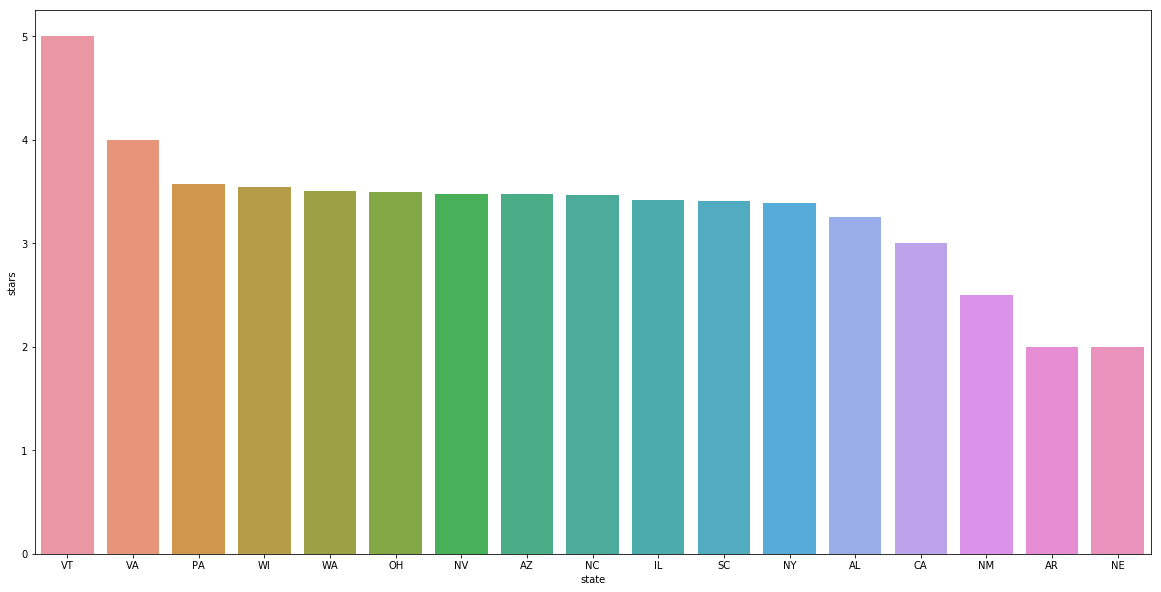

In [127]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
a = sns.barplot(x=avg_stars.index, y="stars", data=avg_stars)

### Now we shall see the distribution of state in this dataset

In [128]:
state_count = bus.state.value_counts()

In [129]:
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

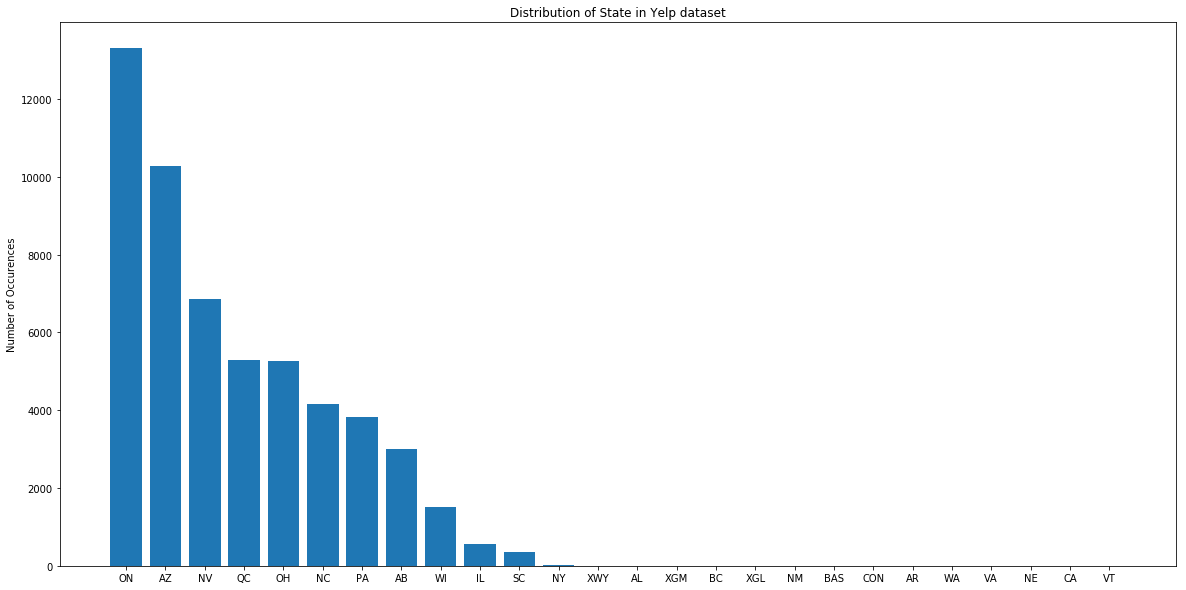

In [130]:
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()



### From this, graph, we see the statewise distribution of restaurants. As we can see, this data consists of restaurants present all over the world. For the sake of simplicity, we will focus on the restaurants present in Illinois.

In [131]:
business_in_IL = bus[bus.state == 'IL']

In [132]:
business_in_IL = business_in_IL.reset_index(drop = True)

In [133]:
business_in_IL

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,713 W Marketview Dr,"{'WiFi': 'u'no'', 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,61822,72.0,2.5,IL
1,1703 Philo Rd,"{'RestaurantsGoodForGroups': 'True', 'Business...",m4DwPVxmFDQE_FnGIOa3cQ,"Buffets, Chinese, Restaurants",Urbana,None,1.0,40.097639,-88.191217,Sunny China Buffet,61802,15.0,3.5,IL
2,207 W Clark St,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Fal...",HbK6IfznbVToEaKVC0WcSg,"Karaoke, American (Traditional), Nightlife, Ta...",Champaign,"{'Tuesday': '16:0-2:0', 'Wednesday': '16:0-2:0...",1.0,40.115017,-88.246156,The Clark Bar,61820,24.0,3.5,IL
3,421 Town Center Rd,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",o9nGD3J0btXjE9M6IdgZTA,"Salad, Delis, Restaurants, Sandwiches, Food",Champaign,"{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',...",1.0,40.141668,-88.250360,McAlister's Deli,61820,50.0,3.0,IL
4,1103 Klein Ave,"{'GoodForKids': 'False', 'BusinessAcceptsCredi...",sDfN5qJlmvrwTfwEPBsxSg,"Fast Food, Ice Cream & Frozen Yogurt, Restaura...",Rantoul,None,1.0,40.311299,-88.142882,Dairy Queen,61866,4.0,2.0,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,410 N Race St,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'n...",nD4cF5IH8RE7LFGdR2FMUA,"Hot Dogs, Restaurants, Burgers",Urbana,None,1.0,40.116172,-88.208663,Windy City Express,61801,28.0,3.5,IL
559,"410 E Green St, Ste 1","{'BusinessAcceptsCreditCards': 'True', 'BYOBCo...",zTGxLMOd9crAz0XNzqrcrA,"Restaurants, Chinese",Champaign,"{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...",1.0,40.110638,-88.232483,Empire Chinese Restaurant,61820,48.0,3.5,IL
560,"701 S Gregory St, Ste A","{'RestaurantsDelivery': 'False', 'RestaurantsR...",0QgFIP9W0eGZSxCSQRQSCg,"Restaurants, Fast Food, Sandwiches",Urbana,None,1.0,40.106711,-88.221752,Subway,61801,6.0,2.5,IL
561,500 S Goodwin Ave,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",gZtJyb2oEpwo1rnovDVPfA,"Bakeries, Restaurants, Food, American (Traditi...",Urbana,"{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3...",1.0,40.108000,-88.222501,Intermezzo Café,61801,11.0,3.5,IL


In [153]:
business_in_IL.attributes[1]

{'RestaurantsGoodForGroups': 'True',
 'BusinessAcceptsCreditCards': 'True',
 'Caters': 'False',
 'WiFi': "u'no'",
 'RestaurantsPriceRange2': '1',
 'RestaurantsReservations': 'False',
 'OutdoorSeating': 'False',
 'Alcohol': "u'none'",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
 'HasTV': 'True',
 'GoodForKids': 'True',
 'RestaurantsDelivery': 'False',
 'NoiseLevel': "u'average'",
 'RestaurantsTakeOut': 'True',
 'BikeParking': 'True',
 'RestaurantsAttire': "u'casual'",
 'Ambience': "{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"}

### The 'attribute' column contains features which we can use to make the recommendations more suitable for the users. For that, we have to break this column and store these features as different columns

In [155]:
def get_superset_of_column_names_from_file(data):
    column_names = set()
    
    for line_contents in data:
        column_names.update(
                set(get_column_names(line_contents))
                )
    return column_names

def get_column_names(line_contents):
    """Return a list of flattened key names given a dict.
    Example:
        line_contents = {
            'a': {
                'b': 2,
                'c': 3,
                },
        }
        will return: ['a.b', 'a.c']
    These will be the column names for the eventual csv file.
    """
    column_names = []
    if line_contents is None:
        return ''
    for k in line_contents.keys():
        column_names.append('{0}'.format(k)
        )
    
    return column_names

In [161]:
superset_cols = get_superset_of_column_names_from_file(business_in_IL.attributes)

# put all those columns in the dataset and initilize them to nan
for col in superset_cols:
    business_in_IL[col]= np.nan

In [166]:
idx = 0
for attr in business_in_IL.attributes:
    if attr is None:
        idx+=1
        continue
    for k,v in attr.items():
        if'{' in v:
            continue
        business_in_IL[k][idx] = v
    idx+=1

In [173]:
null_val = pd.DataFrame(business_in_IL.isna().sum())
print("Null values: ",null_val)
print('n')
print('\n')
print("Shape of original data", business_in_IL.shape)

Null values:                                0
address                       0
attributes                   24
business_id                   0
categories                    0
city                          0
hours                       112
is_open                       0
latitude                      0
longitude                     0
name                          0
postal_code                   0
review_count                  0
stars                         0
state                         0
RestaurantsAttire           189
BusinessAcceptsBitcoin      509
HappyHour                   533
Smoking                     542
Alcohol                     205
Ambience                    554
BestNights                  563
RestaurantsTableService     443
DogsAllowed                 531
NoiseLevel                  227
BusinessParking             552
RestaurantsGoodForGroups    170
WheelchairAccessible        486
ByAppointmentOnly           543
GoodForKids                 174
DietaryRestrictions       

### As we see, the number of records in the dataset is 563 and there are few columns which have no value at all. Therefore, in order to keep the columns which will be most useful to us, we will drop rest of the columns. We will keep a threshold of 300 (if the columns have more than 300 null values, we will drop the column).

In [174]:
col_del = list(null_val[null_val.iloc[:,0] >300].index)# columns to keep
col_del

['BusinessAcceptsBitcoin',
 'HappyHour',
 'Smoking',
 'Ambience',
 'BestNights',
 'RestaurantsTableService',
 'DogsAllowed',
 'BusinessParking',
 'WheelchairAccessible',
 'ByAppointmentOnly',
 'DietaryRestrictions',
 'DriveThru',
 'GoodForDancing',
 'GoodForMeal',
 'CoatCheck',
 'Music',
 'Corkage',
 'BYOBCorkage']

In [175]:
business_in_IL.drop(columns=col_del).isna().sum()

address                         0
attributes                     24
business_id                     0
categories                      0
city                            0
hours                         112
is_open                         0
latitude                        0
longitude                       0
name                            0
postal_code                     0
review_count                    0
stars                           0
state                           0
RestaurantsAttire             189
Alcohol                       205
NoiseLevel                    227
RestaurantsGoodForGroups      170
GoodForKids                   174
Caters                        221
RestaurantsDelivery           146
HasTV                         206
RestaurantsTakeOut             76
BusinessAcceptsCreditCards     36
BikeParking                   146
RestaurantsReservations       174
OutdoorSeating                164
RestaurantsPriceRange2         54
WiFi                          206
dtype: int64

In [176]:
business_in_IL = business_in_IL.drop(columns=col_del)

In [178]:
business_in_IL.to_csv("Business_in_Illinois.csv")

### Now we will be using "Business_in_Illinois.csv" for further EDA and recommender system

In [179]:
## Checking for inconsistent Data
cities = business_in_IL['city'].unique()
cities

array(['Champaign', 'Urbana', 'Rantoul', 'St Joseph', 'Monticello',
       'Mahomet', 'Sidney', 'Fithian', 'Savoy', 'Ogden', 'Tolono',
       'Philo', 'Fisher', 'Villa Grove', 'Homer', 'Mansfield', 'Gifford',
       'Tuscola'], dtype=object)

In [180]:
## There only city with inconsistent name is Saint Joseph, so we will update that
business_in_IL['city'] = business_in_IL['city'].str.lower()
business_in_IL['city'] = business_in_IL['city'].str.strip()

def replace_matches(df, column, string_to_match, min_ratio = 80):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    rows_with_matches = df[column].isin(close_matches)
    df.loc[rows_with_matches, column] = string_to_match
    
for city in cities:
    replace_matches(business_in_IL, column='city', string_to_match=city)

business_in_IL['city'].unique()

array(['Champaign', 'Urbana', 'Rantoul', 'St Joseph', 'Monticello',
       'Mahomet', 'Sidney', 'Fithian', 'Savoy', 'Ogden', 'Tolono',
       'Philo', 'Fisher', 'Villa Grove', 'Homer', 'Mansfield', 'Gifford',
       'Tuscola'], dtype=object)

In [181]:
# city_il = business_in_IL.city.value_counts()
# city_il = city_il.to_frame().reset_index()
# city['latitude'] = business_in_IL[]
# city_il.columns = ['City', 'Counts']

fig = px.scatter_mapbox(business_in_IL, lat="latitude", lon="longitude", hover_name="city", color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [182]:
city_il = business_in_IL.city.value_counts()
city_il = city_il.to_frame().reset_index()
city_il.columns = ['City', 'Counts']
# labels = list(city_il.City)
# sizes = list(city_il.Counts)
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)
# plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# plt.axis('equal')
# plt.show()

###  Distribuiton of restaurant business in Illinois

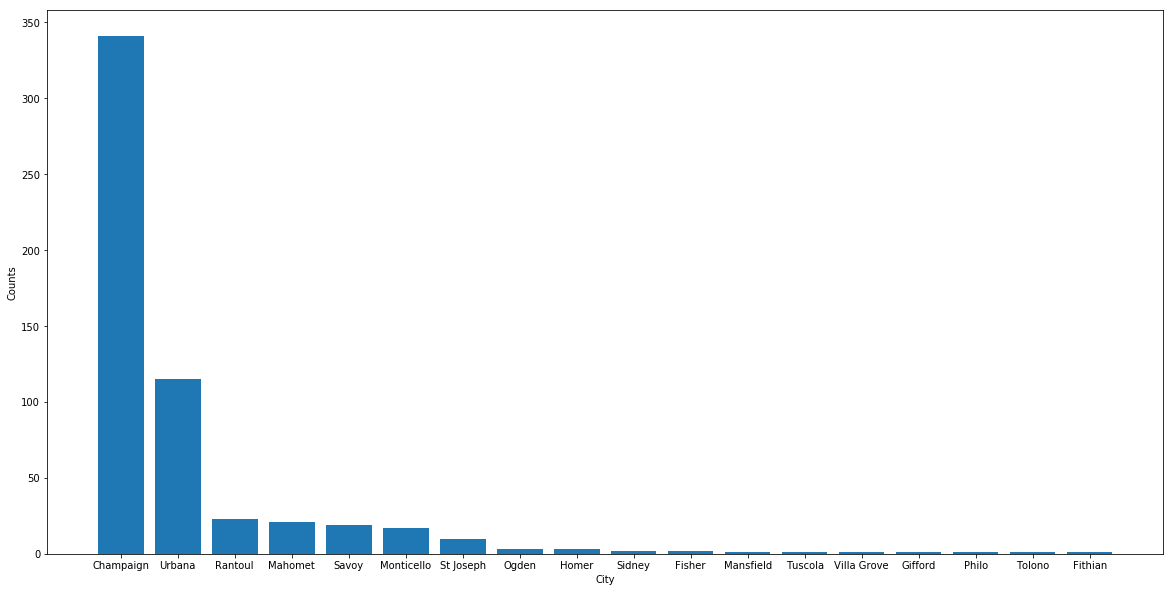

In [183]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(city_il.City, city_il.Counts, align = 'center', alpha = 1)
plt.xlabel("City")
plt.ylabel("Counts")
plt.show()

### Now we will check which all Restaurants got 5-star ratings and how much

In [139]:
reviews = []
with open(os.path.join(os.getcwd(), 'review.json'),encoding="utf8") as f:
    for line in f:
        reviews.append(json.loads(line))

In [151]:
reviews = pd.DataFrame(reviews)

KeyboardInterrupt: 

In [ ]:
business_ratings = pd.merge(business_in_IL, reviews[['review_id', 'business_id', 'stars']], on = 'business_id', how = 'left')

In [ ]:
Five_star = business_ratings[business_ratings['stars_y'] == 5.0]

In [ ]:
Five_star_order = Five_star.name.value_counts()

In [ ]:
Five_star_order = Five_star_order.to_frame().reset_index()
Five_star_order.columns = ['Restaurant', 'Counts']


In [ ]:
Five_star_order = Five_star_order.head(10)
Five_star_order = Five_star_order.sort_values(['Counts'], ascending = True)
Five_star_order

In [ ]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(Five_star_order.Restaurant, Five_star_order.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Number of 5 star ratings')
plt.show()

### We can deduce  Black Dog Smoke & Ale House got the highest amount of 5-star ratings.

In [37]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
ids = business_in_IL.business_id.to_list()

In [40]:
review_IL = reviews[reviews.business_id.isin(ids)]
review_IL

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
746,TfJ2QlHY7sFdPpUyDi27Zg,c_vQnScwjEmPflK9ntnwmw,zswdqM8Av3KxVv9o7_6ORA,4.0,0,0,0,Everything was pretty good but the beef in the...,2017-07-08 17:24:58
973,ilkuxI6oH3s1dEYW_Kxysw,_oxSgMz5Ryfs0NQFqy56Cw,SgG5E7PUrCIsEMP0BVSlTg,5.0,10,0,2,Very pleased with everything I've bought here:...,2013-10-03 11:36:25
1421,X81JNJJg75edpHgT5nb7xw,9qAt7wTgl6mYtxPGZGwyWw,yRKrMWQxQaMeR18s5ajcYw,1.0,0,0,0,Nothing like paying $10+ for a container of cu...,2017-07-18 17:53:48
1492,qChAyy6hNJ4UmEk9XCCPAw,u7UaLSwFyxVOjD8n6V4ROA,SgG5E7PUrCIsEMP0BVSlTg,4.0,6,2,2,Modified my previous review after the store ow...,2013-12-28 23:48:40
2059,dHKIplwLIyzXAr46944qYQ,lWSsSv9BVOK0JO8GGOhuNw,pCer-vIZM05p423MFmiSng,1.0,3,1,0,The service is terrible. \n\nWe had a huge gro...,2015-06-08 17:41:09
...,...,...,...,...,...,...,...,...,...
6685229,eAiLTLujknK3uNcUNeG_uA,MvgEGMQ3kSI_LjmhqYYAFg,abA0s0uxoeOn7zNm-1dDxw,3.0,3,3,3,I have a neutral review of Mia Za's. Here are ...,2018-08-31 19:00:45
6685404,rzBwCHitUKFXZTGtqFdoKA,P-F0EwFFS-kscvsS4mauHw,-zEpEmDfFQL-ph0N3BDlXA,5.0,0,0,0,Best sushi in town! Lots of different rolls to...,2016-03-29 02:42:14
6685422,WXMEIncjSutaMJw_GAv3ig,2g-huKb0Q58EIqBlrpt86Q,bqiBdnyfYxTc4r8hY28q1g,4.0,0,0,0,"Chips warm, salsa medium heat, meal served qui...",2011-07-24 15:33:38
6685451,rCIV3-9d8Z0P40ByfDGVKA,pqNYhwPW37YZP6fWoTouvQ,pMiz7SP82Tknv1NbVqoSfg,5.0,0,0,0,Best bbq in town. It can take a bit to get a t...,2018-03-13 18:53:11


In [41]:
review_IL = pd.merge(review_IL, business_in_IL[['business_id', 'name']], on = 'business_id', how = 'left')
review_IL

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name
0,TfJ2QlHY7sFdPpUyDi27Zg,c_vQnScwjEmPflK9ntnwmw,zswdqM8Av3KxVv9o7_6ORA,4.0,0,0,0,Everything was pretty good but the beef in the...,2017-07-08 17:24:58,Rainbow Garden
1,ilkuxI6oH3s1dEYW_Kxysw,_oxSgMz5Ryfs0NQFqy56Cw,SgG5E7PUrCIsEMP0BVSlTg,5.0,10,0,2,Very pleased with everything I've bought here:...,2013-10-03 11:36:25,Cheese and Crackers
2,X81JNJJg75edpHgT5nb7xw,9qAt7wTgl6mYtxPGZGwyWw,yRKrMWQxQaMeR18s5ajcYw,1.0,0,0,0,Nothing like paying $10+ for a container of cu...,2017-07-18 17:53:48,Arby's
3,qChAyy6hNJ4UmEk9XCCPAw,u7UaLSwFyxVOjD8n6V4ROA,SgG5E7PUrCIsEMP0BVSlTg,4.0,6,2,2,Modified my previous review after the store ow...,2013-12-28 23:48:40,Cheese and Crackers
4,dHKIplwLIyzXAr46944qYQ,lWSsSv9BVOK0JO8GGOhuNw,pCer-vIZM05p423MFmiSng,1.0,3,1,0,The service is terrible. \n\nWe had a huge gro...,2015-06-08 17:41:09,Kofusion
...,...,...,...,...,...,...,...,...,...,...
23670,eAiLTLujknK3uNcUNeG_uA,MvgEGMQ3kSI_LjmhqYYAFg,abA0s0uxoeOn7zNm-1dDxw,3.0,3,3,3,I have a neutral review of Mia Za's. Here are ...,2018-08-31 19:00:45,Mia Za's Cafe
23671,rzBwCHitUKFXZTGtqFdoKA,P-F0EwFFS-kscvsS4mauHw,-zEpEmDfFQL-ph0N3BDlXA,5.0,0,0,0,Best sushi in town! Lots of different rolls to...,2016-03-29 02:42:14,Sakanaya
23672,WXMEIncjSutaMJw_GAv3ig,2g-huKb0Q58EIqBlrpt86Q,bqiBdnyfYxTc4r8hY28q1g,4.0,0,0,0,"Chips warm, salsa medium heat, meal served qui...",2011-07-24 15:33:38,Mi Veracruz Mexican Grill
23673,rCIV3-9d8Z0P40ByfDGVKA,pqNYhwPW37YZP6fWoTouvQ,pMiz7SP82Tknv1NbVqoSfg,5.0,0,0,0,Best bbq in town. It can take a bit to get a t...,2018-03-13 18:53:11,Black Dog Smoke & Ale House


In [72]:
review_IL.to_csv("Review_IL_restaurants.csv")

### Top 10 most reviewed restaurants in Illinois

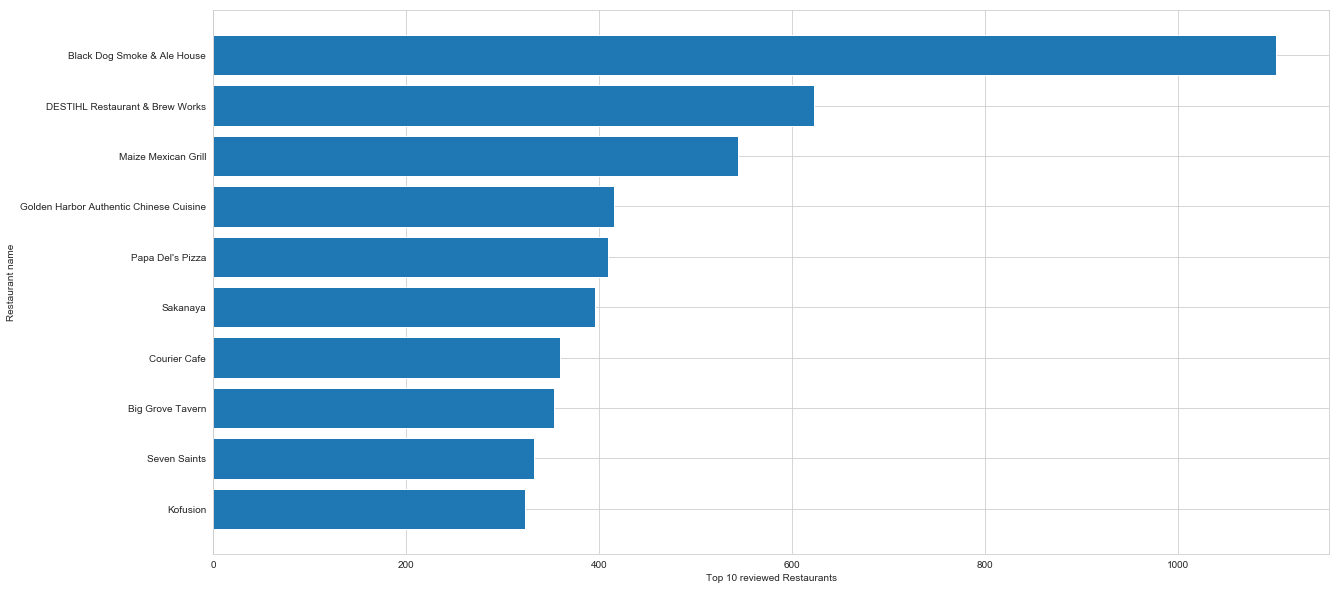

In [71]:
top10_most_reviewed = review_IL.name.value_counts()
top10_most_reviewed = top10_most_reviewed.to_frame().reset_index()
top10_most_reviewed = top10_most_reviewed.head(10)
top10_most_reviewed.columns = ['name', 'Counts']
top10_most_reviewed = top10_most_reviewed.sort_values(['Counts'], ascending = True)
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(top10_most_reviewed.name, top10_most_reviewed.Counts, align = 'center', alpha = 1)
plt.ylabel('Restaurant name')
plt.xlabel('Top 10 reviewed Restaurants')
plt.show()

In [42]:
review_IL['text'] = review_IL.text.str.replace("[^\w\s]", "").str.lower()

In [43]:
review_IL['text'] = review_IL['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [44]:
Black_dog = review_IL[review_IL.name == 'Black Dog Smoke & Ale House']
Black_dog

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name
9947,x20Vhj5qcBbW-08vEbFHOw,lg1UvP-7KLtjSdxbFbt3Aw,9MnbQg7kfb_WgxoV0hXKSQ,5.0,0,0,1,place without doubt best bbq illinois boyfrien...,2011-10-27 15:48:15,Black Dog Smoke & Ale House
9951,BUxau3CCZwnfPZrBt3vK0Q,Jd__AkH8jPv9wN6bfmTW1A,9MnbQg7kfb_WgxoV0hXKSQ,5.0,1,0,0,excellence bbq applesauce green beans sides go...,2018-02-24 02:32:05,Black Dog Smoke & Ale House
9957,2h1BHzhitC9ktYXcTfNqfA,dYAhuu1xauHTh-uhwnMcQw,9MnbQg7kfb_WgxoV0hXKSQ,4.0,0,0,0,beer flights food amazing cool server atmosphe...,2011-04-22 02:16:21,Black Dog Smoke & Ale House
9959,KGHDKrH6ptbvhTJ7NTdQSQ,eEbdbw_Tt6FvqB0Lv_03GA,9MnbQg7kfb_WgxoV0hXKSQ,5.0,0,0,0,burrito special thursday best burrito ive ever...,2016-02-11 22:14:01,Black Dog Smoke & Ale House
9960,lPCfdNu1OmI3QsZMIiBjyQ,Tu3EqdHkeEJeRzOvdvGORw,9MnbQg7kfb_WgxoV0hXKSQ,5.0,0,0,0,two words describe joint outstanding bbq eat m...,2012-04-28 21:31:09,Black Dog Smoke & Ale House
...,...,...,...,...,...,...,...,...,...,...
23639,eKGeqZypuH1TohZX0wTokw,2cKGJSnovT3uSjJxTmWfFA,pMiz7SP82Tknv1NbVqoSfg,5.0,0,0,0,favorite bbq place time far one favorite place...,2018-10-26 17:11:38,Black Dog Smoke & Ale House
23645,66L8Fd1z-wSIpTKH-BAKCQ,LVA5eEqCu_53LVPNGJhPpA,pMiz7SP82Tknv1NbVqoSfg,3.0,0,0,0,delicious meateaters grilled cheese vegetarian...,2017-08-17 20:11:30,Black Dog Smoke & Ale House
23648,InYyniCUT-rik_g06d20_w,qZNjFaaa87iYJSiL6kmAAQ,pMiz7SP82Tknv1NbVqoSfg,1.0,0,0,0,fan giving one star reviews warranted ate twic...,2018-10-27 08:55:26,Black Dog Smoke & Ale House
23652,7P2gi18OarIEGVTL6x1VJg,cFre2eN6hEcSOF96j0xSrQ,pMiz7SP82Tknv1NbVqoSfg,3.0,2,3,2,ill start saying love black dog aside maize fr...,2016-03-05 05:13:20,Black Dog Smoke & Ale House


In [45]:
# sentiment analysis 

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
reviews_IL = reviews[reviews.business_id.isin(list(business_in_IL.business_id))]

In [47]:
# creating bag of words of all the text
bag_of_words = reviews_IL['text'].str.lower().str.cat(sep=' ')

In [48]:
bag_of_words = re.sub('[^A-Za-z]+', ' ', bag_of_words)
bag_of_words[0:1001]

'everything was pretty good but the beef in the mongolian beef was very chewy and had a weird texture i know this is always a chance when trying a new chinese restaurant the rest of the food was very good their noodles are really good and the fried rice very pleased with everything i ve bought here scallops salmon halibut trout the owner provides great customer service they just started carrying low acid coffee which we used to have to buy from trader joes in chicago ask to receive the fish and meat emails nothing like paying for a container of curly fry bits and pieces and a sandwich where the bun is actually more greasy that the bacon that was on it modified my previous review after the store owner s thoughtful response to feedback shared i respect small business owners that put in effort to follow up to feedback shared after his note i have gone back to the business and better understand what their focus areas are summary cheese crackers primarily is an order ahead market the name c

In [49]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [50]:
word_tokens = word_tokenize(bag_of_words)

In [51]:
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [52]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 3]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

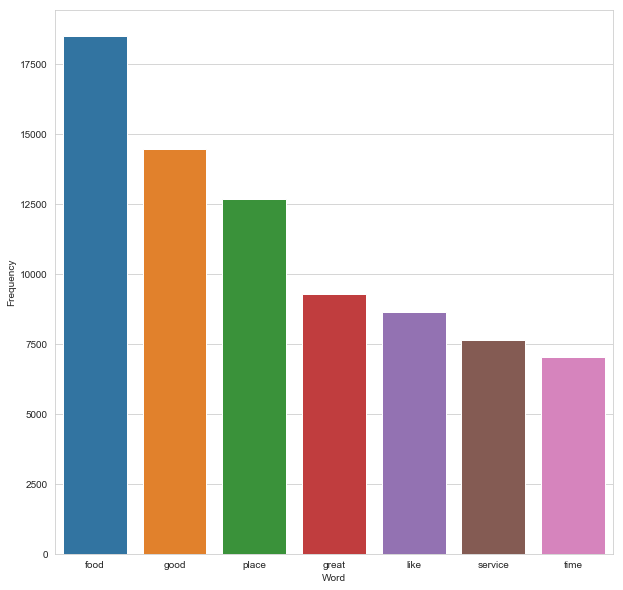

In [53]:
top_N = 100
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [54]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

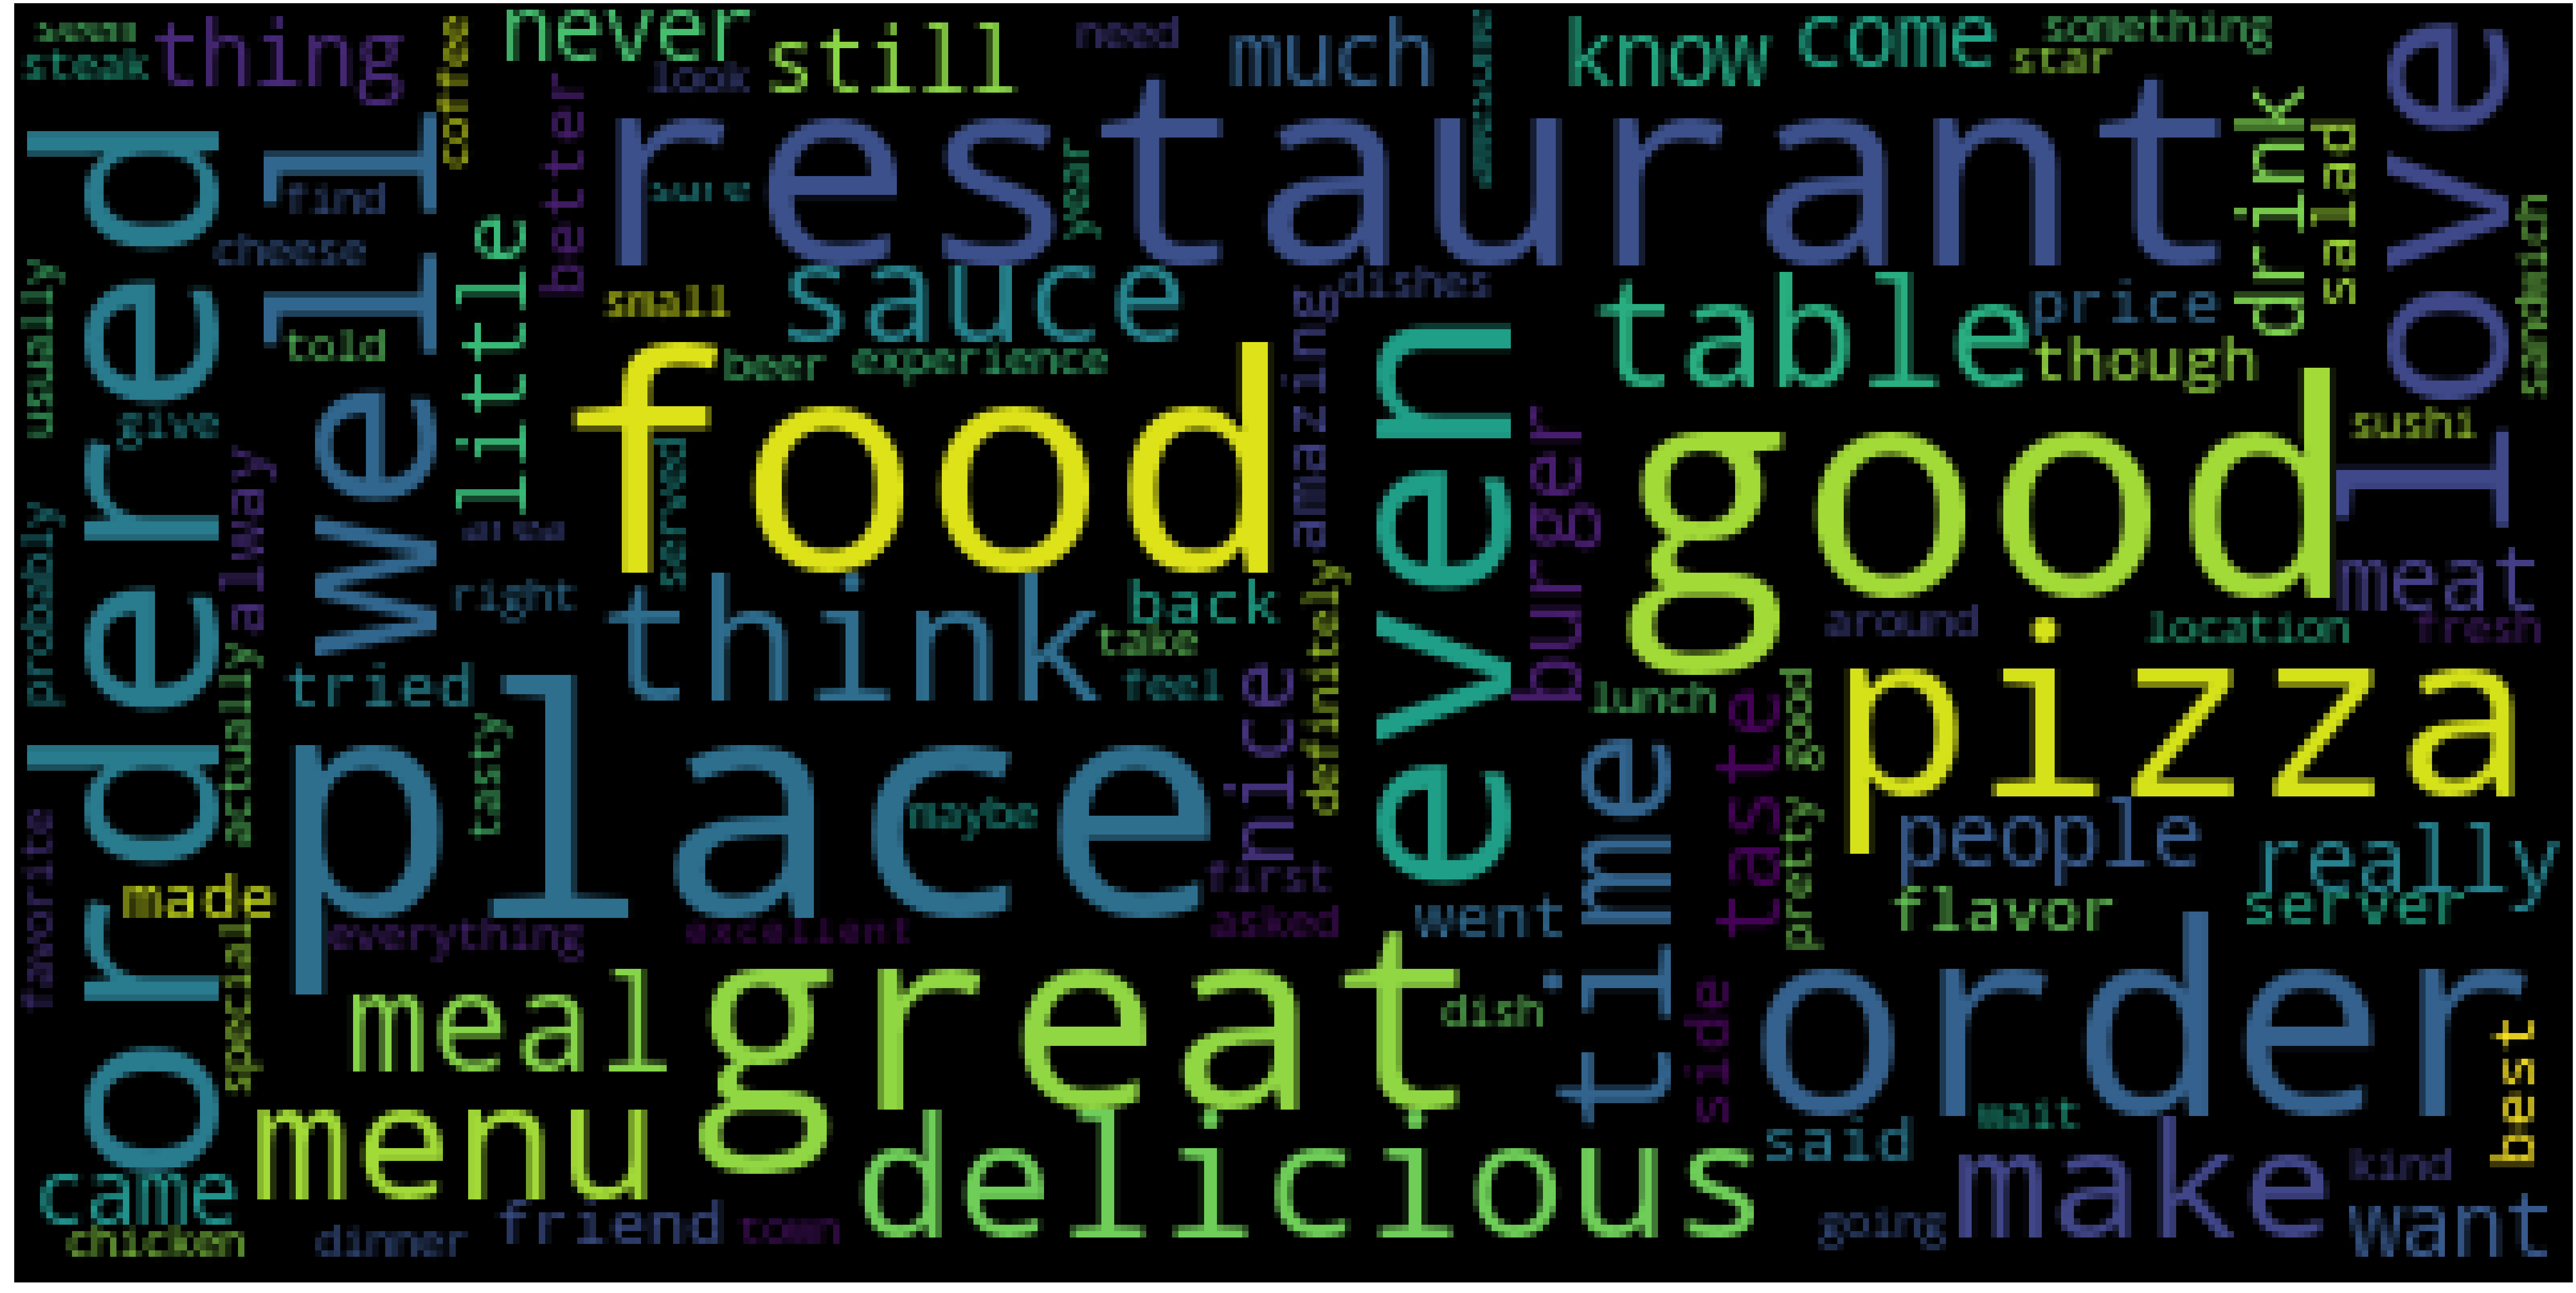

In [55]:
wc(cleaned_data_title,'black','Most Used Words')

In [56]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=reviews_IL['text'].astype(str)

In [57]:
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])

In [58]:
df_polarity_desc.head()

,Review,sentiment,polarity
0,Everything was pretty good but the beef in the...,0.310795,0.591818
1,Very pleased with everything I've bought here:...,0.483333,0.683333
2,Nothing like paying $10+ for a container of cu...,0.500000,0.500000
3,Modified my previous review after the store ow...,0.185498,0.512874
4,The service is terrible. \n\nWe had a huge gro...,-0.154545,0.480952


In [59]:
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

In [60]:
df_polarity_desc['Sentiment_Type'] =df_polarity_desc.apply(f,axis=1)

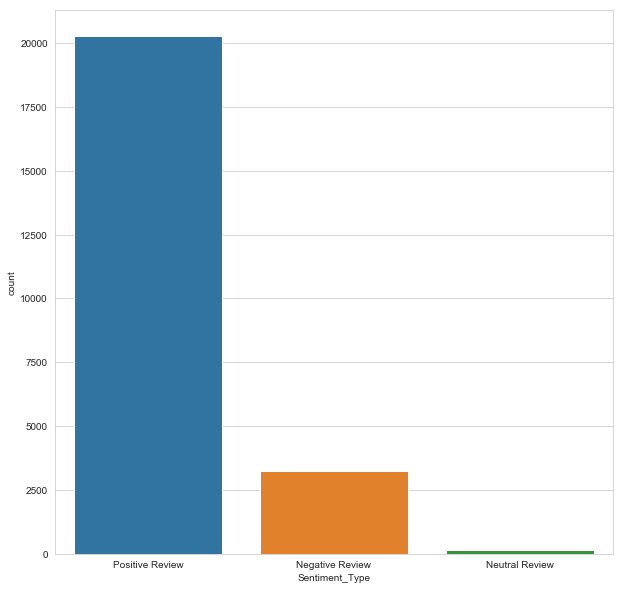

In [61]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [62]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [63]:
negative_reviews.head()

,Review,sentiment,polarity,Sentiment_Type
4,The service is terrible. \n\nWe had a huge gro...,-0.154545,0.480952,Negative Review
6,I would have given this restaurant zero stars ...,-0.206667,0.540000,Negative Review
16,So...no. Just...no. Before I picked up a plate...,-0.023377,0.420491,Negative Review
17,Having been to many other tgifridays I can say...,-0.189000,0.639000,Negative Review
25,Poor Chorizo super burrito. The Chorizo was b...,-0.033333,0.633333,Negative Review
